In [25]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt


In [10]:
# alm = [2, 2303, 147456, 0.016164779663085938, 0.008062362670898438, -2.4301698431372643e-09, 5153.669921875, -0.8645974397659302, -0.39210712909698486, 0.33686935901641846, -0.00047969818115234375, 7.275957614183426e-12, 0, 1, 557776.000445405, 2302]

alm = [2, 2310, 147456, 0.0160369873046875, 0.008001327514648438, -2.5065673980861902e-09, 5153.65966796875, 0.85631263256073, -0.3831392526626587, 0.8815017938613892, -0.00045299530029296875, 7.275957614183426e-12, 0, 1, 528810, 2309]
TOW = 3600 * 20
import SatellitesCoordinateCalculator as SCC
from Transformations import *
import Constants
print(alm)
ecef = SCC.calc_sat_alm(alm, TOW, 2309, K=1)

# print(eci)
# ecef = eci2ecef(TOW*0, *eci)
# print(ecef)
lla = ecef2lla(*ecef)
print(lla)
aer = pm.ecef2aer(*ecef, *Constants.LLA)
print(aer)

[2, 2310, 147456, 0.0160369873046875, 0.008001327514648438, -2.5065673980861902e-09, 5153.65966796875, 0.85631263256073, -0.3831392526626587, 0.8815017938613892, -0.00045299530029296875, 7.275957614183426e-12, 0, 1, 528810, 2309]
(2.1145223771061543, 31.893964208374697, 20346845.0731995)
(187.40048416123412, 23.61960786114554, 23515140.706017416)


In [13]:
def calc_dist(elev):
    r = Constants.ApproximateEarthRadius
    h = Constants.GPSAltitude
    if elev == -91:
        return np.nan
    dist = 0.5 * (
            np.sqrt(2) * np.sqrt(2 * h * h + 4 * h * r + r * r - r * r * np.cos(2 * elev * np.pi / 180)) -
            2 * r * np.sin(elev * np.pi / 180))
    return dist * 1000

In [2]:
!pip install pyubx2

  Obtaining dependency information for pyubx2 from https://files.pythonhosted.org/packages/1b/38/6790210673025c05f626c5359d4442fcc8477809171f22ab249a4c7c6be9/pyubx2-1.2.39-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/72.8 kB ? eta -:--:--
   ----------- ---------------------------- 20.5/72.8 kB 682.7 kB/s eta 0:00:01
   ---------------------------- ----------- 51.2/72.8 kB 660.6 kB/s eta 0:00:01
   ---------------------------------------- 72.8/72.8 kB 573.6 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\kippe\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [1]:
from scipy.optimize import minimize
import pickle, numpy as np
import Constants
from Transformations import *
import Minimizing
# with open('storage478046.999877142.log', 'rb') as storage_file:
#     storage = pickle.load(storage_file)
# good_eph = [satellite for satellite in storage.satellites.values()
#                     if satellite.eph is not None and satellite.rawx]
# with open('7_calculation579118.000331166.log', 'rb') as eph_file:
# with open('calculation196568.000368965.log', 'rb') as eph_file:
with open('calculation316447.999604101.log', 'rb') as eph_file:
# with open('calculation460836.000453519.log', 'rb') as eph_file:
    good_eph = pickle.load(eph_file)
    
# TOW = 579118.000331166
# TOW = 579460.000205107
# TOW = 196568.000368965
TOW = 316447.99
# TOW = 460836

# good_eph = pickle.loads(b"\x80\x04\x95\x7f\n\x00\x00\x00\x00\x00\x00]\x94(\x8c\nSatellites\x94\x8c\tSatellite\x94\x93\x94)\x81\x94}\x94(\x8c\x06gnssId\x94\x8c\x08builtins\x94\x8c\x07getattr\x94\x93\x94h\x01\x8c\x04GNSS\x94\x93\x94\x8c\x03GPS\x94\x86\x94R\x94\x8c\x04svId\x94K\x1a\x8c\x03eph\x94]\x94(K\x1aM\n\tJp\x13\x03\x00Jp\x13\x03\x00K\x0fK\x0fK\x0eG\xbd\xe0\x08\x00\x00\x00\x00\x00G\xbe']\xc0\x00\x00\x00\x00G@0p\x00\x00\x00\x00\x00G@l\xeb\x00\x00\x00\x00\x00G>\xdc8\x00\x00\x00\x00\x00G>\xb2\xf8\x00\x00\x00\x00\x00G>v\x80\x00\x00\x00\x00\x00G>D\x00\x00\x00\x00\x00\x00G>\x1e\x03\x80\x00\x00\x00\x00G?\xd2\xfaeN\x80\x00\x00G?\x82!\xa1\x04\x00\x00\x00G@\xb4!\xa1\xda\xa0\x00\x00G?\xccN\x02\x9d\x00\x00\x00G?\x9f\xeb\xdb\x00\x00\x00\x00G?\xc6\x0b\xd1\xd9\x00\x00\x00G><\x00\x00\x00\x00\x00\x00G\x00\x00\x00\x00\x00\x00\x00\x00G\xbd\x98\x80\x00\x00\x00\x00\x00G?$\x11\x18\x00\x00\x00\x00K\x00K\x00\x8c\x08datetime\x94\x8c\x08datetime\x94\x93\x94C\n\x07\xe8\x05\x0e\n7\x0b\x04D$\x94\x8c\x04pytz\x94\x8c\x02_p\x94\x93\x94(\x8c\rEurope/Moscow\x94M0*K\x00\x8c\x03MSK\x94t\x94R\x94\x86\x94R\x94e\x8c\talm_coord\x94G\xc1p\\\xc8\xf3I\xef\xb1GAF\xa5\xdd8\xc6\x89\x1bGAr\xe4Ay\xaa\xc4S\x87\x94\x8c\teph_coord\x94G\xc1p]\x0f\xd24\xc09GAF\xa9\xafa\x17\x11\xa5GAr\xe4\x1b\x17R4\xc2\x87\x94\x8c\x04rawx\x94h\x01\x8c\x04RAWX\x94\x93\x94)\x81\x94}\x94(\x8c\x05prMes\x94GAv\x8a,\xd3\xd2\x1e\xca\x8c\x05cpMes\x94GA\x9d\x9c\x9ec}i\x96\x8c\x05doMes\x94G@\xa4\x16\x16\xe0\x00\x00\x00\x8c\x06freqId\x94K\x00\x8c\x08locktime\x94K\x00\x8c\x03cno\x94K\x11\x8c\x07prStedv\x94G@4z\xe1G\xae\x14{\x8c\x07cpStedv\x94G?\xae\xb8Q\xeb\x85\x1e\xb8\x8c\x07doStedv\x94G@ bM\xd2\xf1\xa9\xfc\x8c\x07prValid\x94K\x01\x8c\x07cpValid\x94K\x00\x8c\x07halfCyc\x94K\x00\x8c\nsubHalfCyc\x94K\x00ub\x8c\x03sat\x94h\x01\x8c\x03SAT\x94\x93\x94)\x81\x94}\x94(h-K\x12\x8c\x04elev\x94K\x17\x8c\x04azim\x94M2\x01\x8c\x05prRes\x94J\xf4\xff\xff\xff\x8c\nqualityInd\x94K\x04\x8c\x06svUsed\x94K\x01\x8c\x06health\x94K\x01\x8c\x08ephAvail\x94K\x01\x8c\x08almAvail\x94K\x01ub\x8c\x03alm\x94]\x94(K\x1aM\n\tJ\x000\x06\x00G?\x82%\xc0\x00\x00\x00\x00G\xbfl`\x00\x00\x00\x00\x00G\xbe&\x80\x00\x00\x00\x00\x00G@\xb4!\x93\xa0\x00\x00\x00G?\x9f[\xe0\x00\x00\x00\x00G?\xc6\x07\xa5\x00\x00\x00\x00G\xbf\xd3\xe4\xb1\x80\x00\x00\x00G?#\xe0\x00\x00\x00\x00\x00G\xbd\xa0\x00\x00\x00\x00\x00\x00K\x00K\x01h\x14C\n\x07\xe8\x05\x0e\n69\r\xda\xa4\x94h\x1c\x86\x94R\x94eubh\x03)\x81\x94}\x94(h\x06h\x0eh\x0fK\x1ch\x10]\x94(K\x1cM\n\tJ\x80\x13\x03\x00J\x80\x13\x03\x00K=K=M\xec\x02G=\xd3\x90\x00\x00\x00\x00\x00G\xbe%\xce\xc0\x00\x00\x00\x00G\xbf\xfe\x00\x00\x00\x00\x00\x00G@k\xc6\x00\x00\x00\x00\x00G>\xe1O\x00\x00\x00\x00\x00G\xbea\x00\x00\x00\x00\x00\x00G>8\x00\x00\x00\x00\x00\x00G\xber\x00\x00\x00\x00\x00\x00G>\x1a\n\x00\x00\x00\x00\x00G?\xd3\x94\xfc<\x80\x00\x00G?7\xe3\xb1\x00\x00\x00\x00G@\xb4!\xa5\x17\xc0\x00\x00G?\xd1\x89\xa6\xd8\x00\x00\x00G\xbf\xd2`F|\x80\x00\x00G?\xe1i\xc4E\x00\x00\x00G>}\x80\x00\x00\x00\x00\x00G\x00\x00\x00\x00\x00\x00\x00\x00G\xbd\xb1\xe0\x00\x00\x00\x00\x00G\xbf/\xe5h\x00\x00\x00\x00K\x00K\x00h\x14C\n\x07\xe8\x05\x0e\n7\x12\x0b\xa5\xa2\x94h\x1c\x86\x94R\x94eh\x1fG\xc1r\xac\xb4\xdc\x94\xde\xfdG\xc1h\x9cJ\xa5a\xbc\xd1GAg\xc1\xc5\x10\xa3\xa1\xa0\x87\x94h!G\xc1r\xac\xba\xea\x15|\xaaG\xc1h\x9b\xdb\x94\xda\xfb\x19GAg\xc2\x84\xec\x1aS\xff\x87\x94h#h%)\x81\x94}\x94(h(GAv\x0ei\x1f\xa6\xd5\x90h)GA\x9c\xfa\x05\xa24\x01\x8ch*G\xc0\xa3\x8cN \x00\x00\x00h+K\x00h,K\x00h-K\x19h.G@\x14z\xe1G\xae\x14{h/G?\xae\xb8Q\xeb\x85\x1e\xb8h0G@\x00bM\xd2\xf1\xa9\xfch1K\x01h2K\x00h3K\x00h4K\x00ubh5h7)\x81\x94}\x94(h-K\x19h:K h;M\x00\x01h<K\x00h=K\x04h>K\x00h?K\x01h@K\x00hAK\x01ubhB]\x94(K\x1cM\n\tJ\x000\x06\x00G?7x\x00\x00\x00\x00\x00G?xx\x00\x00\x00\x00\x00G\xbe% \x00\x00\x00\x00\x00G@\xb4!\x99\xe0\x00\x00\x00G\xbf\xd2h\xaf\x00\x00\x00\x00G?\xe1U\xb7\xc0\x00\x00\x00G\xbf\xd0j\x7f\x00\x00\x00\x00G\xbf00\x00\x00\x00\x00\x00G\xbd\xb4\x00\x00\x00\x00\x00\x00K\x00K\x01h\x14C\n\x07\xe8\x05\x0e\n6:\x00\x1e\xd0\x94h\x1c\x86\x94R\x94eubh\x03)\x81\x94}\x94(h\x06h\x0eh\x0fK\x1dh\x10]\x94(K\x1dM\n\tJ\x80\x13\x03\x00J\x80\x13\x03\x00K)K)K\xebG\xbd\xd4\x08\x00\x00\x00\x00\x00G\xbe%Q\xc0\x00\x00\x00\x00G@J\xa4\x00\x00\x00\x00\x00G@ly\x00\x00\x00\x00\x00G>\xe1*\x00\x00\x00\x00\x00G>\xc6\xac\x00\x00\x00\x00\x00G>a\x00\x00\x00\x00\x00\x00G\xbe\x80\x80\x00\x00\x00\x00\x00G>\x16N\x00\x00\x00\x00\x00G?\xd3\xca\x12\x80\x00\x00\x00G?g\xcf\x1dP\x00\x00\x00G@\xb4!\x98\xf0\xc0\x00\x00G\xbf\xd7\x15.\x95\x80\x00\x00G?\xda~^\xe3\x00\x00\x00G?\xe9\xbc\x13\x10@\x00\x00G>}`\x00\x00\x00\x00\x00G\x00\x00\x00\x00\x00\x00\x00\x00G=x\x00\x00\x00\x00\x00\x00G\xbfC\x9c}\x00\x00\x00\x00K\x00K\x00h\x14C\n\x07\xe8\x05\x0e\n7\x0b\x06\x8d\xdc\x94h\x1c\x86\x94R\x94eh\x1fG\xc1T\xe4St\xdc\xb9\x19G\xc1l\x1b \xa6\xa2l\x03GAtaGD\x84[\xa1\x87\x94h!G\xc1T\xe3\xf1\xe4\xf2y\xe7G\xc1l\x1a\x9d\x99\xc6\xdf\x18GAta\x88\xf0\xf0P\xc9\x87\x94h#h%)\x81\x94}\x94(h(GAs\xeb\x80\x8c\x8a\x0e\x95h)GA\x9a+\x84!\xd3\xc5\xa9h*G@pDF\x00\x00\x00\x00h+K\x00h,K\x00h-K\x17h.G@4z\xe1G\xae\x14{h/G?\xae\xb8Q\xeb\x85\x1e\xb8h0G@ bM\xd2\xf1\xa9\xfch1K\x01h2K\x00h3K\x00h4K\x00ubh5h7)\x81\x94}\x94(h-K\x17h:KMh;M\t\x01h<J\xb4\xff\xff\xffh=K\x04h>K\x01h?K\x01h@K\x01hAK\x01ubhB]\x94(K\x1dM\n\tJ\x000\x06\x00G?g\xd7\x00\x00\x00\x00\x00G?\x82\xd2\x00\x00\x00\x00\x00G\xbe%\x98\x00\x00\x00\x00\x00G@\xb4!\x8b\x80\x00\x00\x00G?\xdau\xdf\x80\x00\x00\x00G?\xe9\xc3\xd8@\x00\x00\x00G\xbf\xec\x9e$\xc0\x00\x00\x00G\xbfC\x98\x00\x00\x00\x00\x00G\x00\x00\x00\x00\x00\x00\x00\x00K\x00K\x01h\x14C\n\x07\xe8\x05\x0e\n6:\x00\xe2!\x94h\x1c\x86\x94R\x94eubh\x03)\x81\x94}\x94(h\x06h\x0eh\x0fK\x1fh\x10]\x94(K\x1fM\n\tJ\x80\x13\x03\x00J\x80\x13\x03\x00K\x07K\x07K\xe3G=\xc0\x00\x00\x00\x00\x00\x00G\xbe&o\xc0\x00\x00\x00\x00G@\x08\x80\x00\x00\x00\x00\x00G@k1\x00\x00\x00\x00\x00G>\xe1\xb1\x00\x00\x00\x00\x00G>\x98\x80\x00\x00\x00\x00\x00G>\x87\x80\x00\x00\x00\x00\x00G\xbe\x84\x80\x00\x00\x00\x00\x00G>\x1b0\x00\x00\x00\x00\x00G?\xd3p\t`\x00\x00\x00G?\x85wP\xb0\x00\x00\x00G@\xb4!\xb8\x03\x00\x00\x00G?\xdcu\xd4)\x00\x00\x00G\xbf\xd1C\x02\x80\x00\x00\x00G?\xcbx\xfc?\x00\x00\x00G>|`\x00\x00\x00\x00\x00G\x00\x00\x00\x00\x00\x00\x00\x00G=@\x00\x00\x00\x00\x00\x00G\xbf-\xdc\xc0\x00\x00\x00\x00K\x00K\x00h\x14C\n\x07\xe8\x05\x0e\n7\x0b\x08\x9e\xd7\x94h\x1c\x86\x94R\x94eh\x1fG\xc1q.a\xee\xd5^\x14G\xc1Ic\n[\xe1j\xf3GArD\x0b\x02\x8aM.\x87\x94h!G\xc1q.c\xed\x04\xa3\xdaG\xc1I_\xbc\xc1\xb2\x1c\xd7GArDE\x9f\x9fB\xcb\x87\x94h#h%)\x81\x94}\x94(h(GAu\xfb\xf2_(K=h)GA\x9c\xe1\xc3\xd3\xd6\xc3\xbah*G\xc0\x85r\xc3`\x00\x00\x00h+K\x00h,K\x00h-K\x17h.G@4z\xe1G\xae\x14{h/G?\xae\xb8Q\xeb\x85\x1e\xb8h0G@ bM\xd2\xf1\xa9\xfch1K\x01h2K\x00h3K\x00h4K\x00ubh5h7)\x81\x94}\x94(h-K\x17h:K h;M$\x01h<K\x15h=K\x04h>K\x01h?K\x01h@K\x01hAK\x01ubhB]\x94(K\x1fM\n\tJ\x000\x06\x00G?\x85w\xc0\x00\x00\x00\x00G?n|\x00\x00\x00\x00\x00G\xbe%X\x00\x00\x00\x00\x00G@\xb4!\xac`\x00\x00\x00G\xbf\xd1K\x83\x80\x00\x00\x00G?\xcb\x7fK\x00\x00\x00\x00G\xbf\xb6\xc0P\x00\x00\x00\x00G\xbf-\xe0\x00\x00\x00\x00\x00G\x00\x00\x00\x00\x00\x00\x00\x00K\x00K\x01h\x14C\n\x07\xe8\x05\x0e\n6:\x02h`\x94h\x1c\x86\x94R\x94eube.")

# TOW = 201337

print(f'Days of week: {(TOW/3600) / 24}, hours: {(TOW/3600) % 24}, minutes: {(TOW %3600)/60}')
print()
# good_eph = [good_eph[0]] + good_eph[2:]
# good_eph = good_eph[:4]
# print(good_eph)
# REAL = {
#     25: ((54.3, 10.2, 19924), 20232), ##
#     28: ((-17, 113.4, 20208), 28006), ##
#     29: ((18.8, -6.1, 20230), 22964), ##
#     32: ((19.8, -39.1, 20162), 24668), ##
#     12: ((47.9, 49.5, 19997), 20142), ##
#     24: ((-7.7, 36.3, 20465), 24661), ##
#     31: ((46.6, -94, 19941), 24846), ##
#     6: ((56.2, 116.2, 20239), 22242), ##
# }

# REAL = {
#     25: ((54.3, 10.2, 19924), 20232), ##
#     28: ((-17, 113.4, 20208), 28006), ##
#     29: ((18.8, -6.1, 20230), 22964), ##
#     32: ((19.8, -39.1, 20162), 24668), ##
#     12: ((47.9, 49.5, 19997), 20142), ##
#     24: ((-7.7, 36.3, 20465), 24661), ##
#     31: ((46.6, -94, 19941), 24846), ##
#     6: ((56.2, 116.2, 20239), 22242), ##
# }

REAL = { #     2, 17, 3, 22, 19, 21
    2: ((46.1, 17.3, 20616), 20933),
    3: ((37.5, -21.2, 20054), 22169 ),
    17: ((54.6, -63.7, 20549), 23579),
    19: ((51.8, -104.7, 20114), 24799),
    21: ((36.5, 31.5, 20844), 21325),
    22: ((52.3, 7.8, 20211), 20601),
}

BAD_EPH = [22]#[22, 2]#[6, 28, 25]
for sat in good_eph:
    # sat.eph_coord = SCC.calc_sat_eph(sat.eph, )
    E = np.array(sat.eph_coord)
    A = np.array(sat.alm_coord)
    # print('BAD' if sat.svId in BAD_EPH else 'GOOD')
    # print(sat.sat.svUsed)
    print(f'SV: {sat.svId}')
    print(f'alm: {A} m')
    print(f'eph: {E} m')
    # ubx = aer2ecef(sat.sat.azim, sat.sat.elev, calc_dist(sat.sat.elev), *Constants.LLA )
    # print(ubx)
    print(f'lla: {ecef2lla(*E)}')
    print(f'alm - eph norm error: {np.linalg.norm(A-E)} m')
    print(f'PR: {sat.rawx.prMes / 1000} km')
    print(f'REAL LLA: {REAL[sat.svId][0]}')
    print(f'READ DIST : {REAL[sat.svId][1]} km')
    print(f'dT: {(sat.rawx.prMes - 1000*REAL[sat.svId][1])/Constants.c}')
    # ecef = sat.alm_coord# eci2ecef(TOW, *sat.eph_coord)
    # print(np.linalg.norm(np.array(ecef) - np.array(Constants.ECEF)))
    # print(np.linalg.norm(np.array(ecef) - np.array(ubx)))
    # print()
    # sat.eph_coord = sat.alm_coord

# for i in range(len(good_eph)):
#     lla = REAL[good_eph[i].svId][0]
#     ecef = lla2ecef(lla[0], lla[1], lla[2]*1000)
#     # eci = ecef2eci(TOW, *ecef)
#     good_eph[i].eph_coord = ecef
#     good_eph[i].rawx.prMes = REAL[good_eph[i].svId][1] * 1000
    
    
good_eph = [ sat for sat in good_eph if sat.svId not in BAD_EPH]
# good_eph = good_eph[1:4] + [good_eph[-1]]
# good_eph = good_eph[1:]# + [good_eph[-1]]
# good_eph = good_eph[:4]

# for sat in good_eph:
#     print(sat.svId)
#     sat.eph_coord = np.array(aer2ecef(sat.sat.azim, sat.sat.elev, sat.rawx.prMes, *Constants.LLA))
    # dist = sat.rawx.prMes + Constants.c * 0.008
    # sat.rawx.prMes = dist
    # sat.rawx.prMes = sat.rawx.cpMes / (1575.42e6 / Constants.c)

    # sat.ubx = np.array(aer2eci(sat.sat.azim, sat.sat.elev, dist, *Constants.LLA, TOW))
    # sat.eph_coord = np.array(sat.eph_coord)
    # V = sat.eph_coord - ecef2eci(TOW, *Constants.ECEF)
    # e = V / np.linalg.norm(V)
    # sat.eph_coord -= e + 0.008 * Constants.c
    # print(sat.ubx)
    # print(sat.eph_coord)
    # print(sat.ubx - sat.eph_coord)
    # print(np.linalg.norm(sat.ubx - sat.eph_coord))
    
    # me_eci =np.array(list(ecef2eci(TOW, *Constants.ECEF)))
    # sat.rawx.prMes = np.linalg.norm(sat.eph_coord - me_eci)
    # sat.eph_coord = sat.ubx
    
print('--------------------------------')
print(len(good_eph))
# func = Minimizing.get_minimize_function(good_eph)
func = Minimizing.apply_func(good_eph, Minimizing.func)
# me = np.array(list(ecef2eci(TOW, *Constants.ECEF)) + [0])
# print(f'ME: {func(me)}')
xyzt0 = np.array([0, 0, 0, 0])
# xyzt0 = np.array(list(Constants.ECEF) + [-0.008])
# xyzt0 = np.array([0, 0, 0, 0, 0])
# xyzt0 = np.array([-1e6, 3.5e6, 5e6, -1e-3])

# myeci = list(ecef2eci(TOW, *lla2ecef(*Constants.LLA)))
# xyzt0 = np.array(myeci + [0])
# bounds = [(None, None), (None, None), (None, None), (None, -0.003)]  # Ограничения для последней переменной

# xyzt = minimize(
#                 func,
#                 xyzt0,
#                 method='BFGS',
#                 jac=Minimizing.get_minimize_derivative(good_eph),
#            #     bounds=bounds,
#                 options={'disp': True, 'maxiter': 1000},#, 'gtol': 1e-8},
#                 tol=1e-12
#         )


# import tensorflow as tf
# import tensorflow_probability as tfp

# xyzt = Minimizing.solver2(good_eph)
# xyzt = xyzt.x
# xyzt = Minimizing.my_minimize(good_eph, 1)
# xyzt [ 0] * 4
from datetime import datetime, timedelta
# t1 = datetime.now()
# for i in range(100):
xyzt = Minimizing.solve_navigation_task(good_eph)
# xyzt = Minimizing.solve_navigation_task1(good_eph).x
# t2 = datetime.now()
# dt = t2-t1
# print(dt)
ecef = xyzt[:3]
# ecef = eci2ecef(TOW, *xyz) #####################################################################################
lla = ecef2lla(*ecef) #eci2lla(TOW, *xyz)
# lla = pm.ecef2geodetic(*ecef)
# jac=Minimizing.get_minimize_derivative(good_eph)
jac = Minimizing.apply_func(good_eph, Minimizing.jac)
print(xyzt)
# print(f'func: {func(xyzt)}')
# print(f'func: {func(xyzt.x + np.array([0, 0, 0, 0]))}')
print(f'jac: {jac(xyzt)}')
# print(np.linalg.norm(np.array(xyz)))
# print(np.linalg.norm(np.array(ecef)))
print(f'ECI xyz and dT: {xyzt}')
print(f'ECEF xyz: {ecef}')
print(np.linalg.norm(ecef))
print(f'LLA calculated:{lla}')
# print(f'ECEF my valid: {lla2ecef(*Constants.LLA)}')
print(f'LLA my valid: {Constants.LLA}')
print(f'ECEF my valid: {Constants.ECEF}')
print(f'Full error: {np.linalg.norm(np.array(ecef) - np.array(Constants.ECEF))}')
a = 0
print('=======================================================')
dT = xyzt[-1]

print(f'dT: {dT}')

# print('-------------------------------')
# print(Constants.ECEF)
# for sat in good_eph:
#     print(sat.svId)
#     print(sat.eph_coord)
#     print(np.linalg.norm(np.array(sat.eph_coord) - np.array(Constants.ECEF)))
#     print(sat.rawx.prMes)
#     print()

# for satellite in good_eph:

#     print(f'SV: {satellite.svId}')
#     print(f'LLA coord of eph: {eci2lla(TOW, *satellite.eph_coord)}, ECI: {satellite.eph_coord}')
#     # print(f'LLA coord of alm: {eci2lla(TOW, *satellite.alm_coord)}, ECI: {satellite.alm_coord}')
#     R = np.linalg.norm(np.array(satellite.eph_coord) - np.array(Constants.ECI))
#     print(f'Pseudorange: {satellite.rawx.prMes}')
#     print(f'Calcuated R: {R}')
#     print(f'Error: {abs(R-satellite.rawx.prMes)}')
#     print(f'Correcet R + c*dT: {R + Constants.c * (dT / Minimizing.TimeCoefficient)}')
#     print(f'Error: {abs(R + Constants.c*(dT /Minimizing.TimeCoefficient) - satellite.rawx.prMes)}')
#     print('-------------------')

# xyzt.x = xyzt0
# for satellite in good_eph:
#     print(f'SV: {satellite.svId}')
#     # print(f'LLA coord of eph: {eci2lla(TOW, *satellite.eph_coord)}, ECI: {satellite.eph_coord}')
#     # print(f'LLA coord of alm: {eci2lla(TOW, *satellite.alm_coord)}, ECI: {satellite.alm_coord}')
#     R = Minimizing.calc_rho(satellite, xyzt.x)
#     dR = Minimizing.calc_dRho(satellite, xyzt.x)
#     print(f'R: {R}')
#     print(f'dRho: {dR}')
#     print(f'R + c*dT: {R + Constants.c * xyzt.x[-1]}')
#     print(f'Pr: {satellite.rawx.prMes}')
#     print('-------------------')
# b = 0


Days of week: 3.662592476851852, hours: 15.902219444444441, minutes: 54.13316666666651

SV: 2
alm: [17835717.2555608   5534038.22190449 19474698.00409639] m
eph: [17835246.35922153  5532866.15649337 19476234.03905512] m
lla: (46.25047794843333, 17.23498238224577, 20615078.39141065)
alm - eph norm error: 1988.6890367153285 m
PR: 18785.738115785476 km
REAL LLA: (46.1, 17.3, 20616)
READ DIST : 20933 km
dT: -0.007162494675614969
SV: 17
alm: [  6807413.41283533 -14005434.42097807  21951648.89928327] m
eph: [  6806570.25211145 -14004547.80790543  21952651.18397268] m
lla: (54.69494401976605, -64.07905661999251, 20550317.244875353)
alm - eph norm error: 1581.6375518691584 m
PR: 21126.147079653536 km
REAL LLA: (54.6, -63.7, 20549)
READ DIST : 23579 km
dT: -0.008181836650295135
SV: 3
alm: [19564921.71213847 -7686609.83881792 16004761.02508962] m
eph: [19566167.86386935 -7685982.47011826 16004376.98032479] m
lla: (37.32780052650774, -21.4458937489024, 20050332.80009709)
alm - eph norm error: 144

In [10]:
from Minimizing import *
from Transformations import *
solve, iter, xtol = Newton(
    func=apply_func(good_eph, func),
    jac=apply_func(good_eph, jac),
    hess=apply_func(good_eph, hess),
    x0=np.array([0,0,0,0]),
    # x0=np.array([2.77427e6,2.03699e6,4.79589e6,-8.718e-3]),
    jtol=0,
    xtol=1e-8
)
print(solve)
print(iter)
print(xtol)

[ 2.77427060e+06  2.03699507e+06  4.79589028e+06 -8.71873753e-03]
3
6.0778104315289484e-09


In [ ]:
import numpy as np
import Minimizing
d = 1e-6
good_eph = good_eph[:4]
xyzt = Minimizing.my_minimize(good_eph, lin_d=1000)
print(xyzt)
exef = xyzt[:3]
lla = ecef2lla(*ecef)
print(lla)

In [8]:
import numpy as np
import Minimizing

for p in np.arange(-10, -16, -0.3):
    d = 10**p
    try:
        xyzt = Minimizing.my_minimize(good_eph, d)
        print(xyzt)
        exef = xyzt[:3]
        lla = ecef2lla(*ecef)
        print(lla)
    except Exception as e:
        print(d, e)

1e-08 overflow encountered in scalar power
5.011872336272715e-09 overflow encountered in scalar add
2.511886431509572e-09 overflow encountered in scalar power
1.258925411794161e-09 overflow encountered in scalar power
6.309573444801891e-10 overflow encountered in scalar power
3.1622776601683537e-10 overflow encountered in scalar power
1.584893192461098e-10 overflow encountered in scalar power
7.943282347242724e-11 cannot access local variable 'x1' where it is not associated with a value
3.9810717055349204e-11 cannot access local variable 'x1' where it is not associated with a value
1.9952623149688502e-11 cannot access local variable 'x1' where it is not associated with a value
9.999999999999836e-12 cannot access local variable 'x1' where it is not associated with a value
5.011872336272632e-12 cannot access local variable 'x1' where it is not associated with a value
2.5118864315095306e-12 cannot access local variable 'x1' where it is not associated with a value
1.2589254117941404e-12 ca

In [6]:
sat = good_eph[-1]
print(sat.rawx.prMes)
print(sat.rawx.cpMes)
pr = sat.rawx.cpMes / (1575.42e6 / Constants.c)
print(pr)

22448121.567187708
117965663.36910293
22448119.346602127


In [18]:
print('''
         Current function value: 0.000000
         Iterations: 18
         Function evaluations: 30
         Gradient evaluations: 25
  success: True
   status: 2
      fun: 1.3877787807814457e-17
        x: [-9.388e+05  3.479e+06  5.245e+06 -8.000e-03]
      jac: [-6.920e-09 -2.513e-09 -1.141e-09  2.234e+00]

ECI xyz and dT: [-9.38794898e+05  3.47899241e+06  5.24521483e+06 -8.00000000e-03]
ECEF xyz: (2845020.0204312904, 2211466.732658038, 5245214.832847864)
6363725.533760497
LLA calculated:(55.69055555555554, 37.85833333333314, 139.9999999943351)
LLA my valid: [55.690555555555555, 37.858333333333334, 140]
ECEF my valid: (2845020.0204312843, 2211466.732658049, 5245214.832847871)
Full error: 1.4284496801139756e-08
''')



         Current function value: 0.000000
         Iterations: 18
         Function evaluations: 30
         Gradient evaluations: 25
  success: True
   status: 2
      fun: 1.3877787807814457e-17
        x: [-9.388e+05  3.479e+06  5.245e+06 -8.000e-03]
      jac: [-6.920e-09 -2.513e-09 -1.141e-09  2.234e+00]

ECI xyz and dT: [-9.38794898e+05  3.47899241e+06  5.24521483e+06 -8.00000000e-03]
ECEF xyz: (2845020.0204312904, 2211466.732658038, 5245214.832847864)
6363725.533760497
LLA calculated:(55.69055555555554, 37.85833333333314, 139.9999999943351)
LLA my valid: [55.690555555555555, 37.858333333333334, 140]
ECEF my valid: (2845020.0204312843, 2211466.732658049, 5245214.832847871)
Full error: 1.4284496801139756e-08


In [89]:
from geneticalgorithm import geneticalgorithm as ga

ecef = Constants.ECEF
print(ecef)
TOW = 0
print(TOW)
eci1 = ecef2eci(TOW, *ecef)
from datetime import datetime, timedelta
dt0 = datetime(1980, 1, 6, 0, 0, 18, tzinfo=Constants.tz_utc)
dt = dt0 + timedelta(seconds=TOW, weeks=2313)
eci2 = pm.ecef2eci(*ecef, dt)
print(eci1)
# print(eci2)
print(np.linalg.norm(np.array(eci1)-np.array(eci2)))

def dist(tow, seconds):
    dt = dt0 + timedelta(seconds=tow + seconds, weeks=2313)
    # print(dt)
    eci2 = pm.ecef2eci(*ecef, dt)
    # print(eci2)
    dist = np.linalg.norm(np.array(eci1)-np.array(eci2))
    return dist

for TOW in range(0, 3600*24, 3600):
    print(f'TOW: {TOW}')
    print(dist(TOW, -3*3600))
    print(dist(TOW, (-3+12)*3600))
    print(dist(TOW, (-3-12)*3600))
    print(dist(TOW, (-3-24)*3600))
    print()
# solve = minimize(min_func, np.array([3600*12]))

# ar = []
# for sec in range(-7*24*3600, 7*24*3600, 3*300):
#     ar.append((sec, dist(TOW, sec)))
# for sec in range(280000, 285000, 10):
#     ar.append((sec, min_func(sec)))
# ar.sort(key=lambda x: x[1])
# print(ar)

# bounds = np.array([[0, 7*24*3600]])
# algorithm_param = {'max_num_iteration': 50,
#                    'population_size': 100,
#                    'mutation_probability': 0.1,
#                    'elit_ratio': 0.01,
#                    'crossover_probability': 0.5,
#                    'parents_portion': 0.3,
#                    'crossover_type': 'uniform',
#                    'max_iteration_without_improv': None}
# model = ga(function=min_func, dimension=1, variable_type='real', variable_boundaries=bounds)
# model.run()
# print(model)

(2845020.0204312843, 2211466.732658049, 5245214.832847871)
0
(2845020.0204312843, 2211466.732658049, 5245214.832847871)
6696140.820025986
TOW: 0
7195772.466977426
102877.50705999178
164505.24641103056
7194361.603895995

TOW: 3600
7151298.288325948
840644.3111213612
779142.9914658027
7157999.176005685

TOW: 7200
6983793.817143568
1768875.9045771563
1708810.0003300265
6998491.1676719

TOW: 10800
6696140.820025986
2666707.639321253
2609115.016663637
6718581.774059319

TOW: 14400
6293288.119185702
3518669.046994865
3464541.0862874296
6323086.596561971

TOW: 18000
5782166.465219764
4310098.538698062
4260366.603973602
5818809.804627477

TOW: 21600
5171569.326849886
5027378.930085112
4982898.660123572
5214427.10375103

TOW: 25200
4472001.665230063
5658169.533760006
5619706.18547224
4520336.53231882

TOW: 28800
3695499.346267565
6191617.941948076
6159833.243784686
3748479.7048862404

TOW: 32400
2855422.480937525
6618546.55840701
6593987.333022304
2912136.744049284

TOW: 36000
1966227.123189689

In [85]:
# min_func(9.3*3600)

In [2]:
# xyzt = xyzt.x
def dRho(satellite):
    return Minimizing.calc_rho(satellite, xyzt.x) + Constants.c * xyzt.x[3] / Minimizing.TimeCoefficient - satellite.rawx.prMes
dT = list([2 * Constants.c * dRho(satellite) for satellite in good_eph])
R = list([dRho(satellite)**2 for satellite in good_eph])
print(dT)
print(sum(dT))
print(R)
print(sum(R))
print('--------------------------')
satellite = good_eph[0]
print(Minimizing.calc_rho(satellite, xyzt.x))
print(Constants.c * xyzt.x[3] / Minimizing.TimeCoefficient)
print(satellite.rawx.prMes)

SyntaxError: invalid syntax (744501322.py, line 1)

In [7]:
from astropy.time import Time
DEFAULT_OBSTIME = Time("J2000", scale="tt")
# !pip install gps-time

In [11]:
from astropy import coordinates as coord
from astropy.time import Time
import astropy.units as u
import numpy as np
from gps_time import GPSTime

# Пример ECI координат (x, y, z)
ec = ecef * u.km

utc = GPSTime(2313, TOW).to_datetime()
# obs_time = Time.now()

# Создание объекта SkyCoord с ECI координатами и временем наблюдения
ecef_coord = coord.SkyCoord(x=ec[0], y=ec[1], z=ec[2], obstime=utc, frame='itrs', representation_type='cartesian')

# Получение ECEF координат
eci_coord = ecef_coord.transform_to('icrs')

In [30]:
import SatellitesCoordinateCalculator as SCC
from SatellitesCoordinateCalculator import *
N = 2310
i = 4
print(TOW)
print(good_eph[i].alm)
# for k in np.arange(1.03569, 1.03570, 0.000001):
#     print(k)
k = 1.035696
p1 = Acalc_sat_alm(good_eph[i].alm, TOW, N, k)
print(p1)
print(eci2lla(TOW, *p1))
print(good_eph[i].eph)
p2 = SCC.calc_sat_eph(good_eph[i].eph, TOW, N)
print(p2)
print(eci2lla(TOW, *p2))

579118.000331166
[17, 2311, 147456, 0.013410091400146484, 0.008474349975585938, -2.6047928258776665e-09, 5153.6572265625, 0.5290583372116089, -0.4217498302459717, 0.8842452764511108, 0.0007104873657226562, 0.0, 0, 1, datetime.datetime(2024, 4, 20, 19, 51, 1, 480657, tzinfo=<DstTzInfo 'Europe/Moscow' MSK+3:00:00 STD>)]
1.035696
-173137.99966883403
2.2100573269787347
(-15490225.905241322, -4014787.60301065, 21593484.119341377)
(53.50304789949836, -89.4898395210575, 20512127.890603006)
[17, 2310, 583184, 583184, 8, 8, 232, -1.0118128557223827e-10, -2.5535200620652176e-09, -54.9375, 291.0625, 4.734843969345093e-06, -2.635642886161804e-06, 1.3969838619232178e-07, 1.9185245037078857e-07, 1.4808847481617704e-09, 0.3084875871427357, 0.013404096011072397, 5153.707925796509, -0.9651154428720474, 0.5678392145782709, -0.42194465594366193, 1.0803341865539551e-07, 0.0, -1.0231815394945443e-12, 0.0007107830606400967, 0, 0, datetime.datetime(2024, 4, 20, 19, 51, 24, 476365, tzinfo=<DstTzInfo 'Europe/M

In [10]:
def check_time(time, *args, **kwargs):
    half_week = 302400.0
    if time > half_week:
        time -= 2 * half_week
    elif time < - half_week:
        time += 2 * half_week
    return time

def Acalc_sat_alm(ALM: list or None, time, N, k):
    if ALM is None or not time or not N:
        return None
    # SV_ID, week, Toa, e, delta_i, Wdot, sqrtA, W0, w, M0, af0, af1, health, Data_ID, receiving_time = ALM
    SV_ID = ALM[0]  # ID спутника
    N0a = ALM[1]  # номер недели передаваемых данных
    Toa = ALM[2]  # опорное время внутри недели N, на которую передаются данные альманах
    e = ALM[3]  # эксцентриситет
    di = ALM[4] * pi  # rad, поправка к наклонению
    OmegaDot = ALM[5] * pi  # rad/s, скорость прецессии орбиты
    sqrtA = ALM[6]  # корень из большей полуоси
    Omega0 = ALM[7] * pi  # rad Угол восходящего узла на момент начала недели N
    omega = ALM[8] * pi  # rad аргумент перигея
    M0 = ALM[9] * pi  # rad средняя аномалия на эпоху Toa
    af0 = ALM[10]  #
    af1 = ALM[11]  #
    health = ALM[12]  #
    Data_ID = ALM[13]  #
    receiving_time: datetime = ALM[14]  # время принятия сигнала

    CORRECTION_FACTOR = k#1.1
    print(CORRECTION_FACTOR)

    OmegaEarthDot = Constants.OmegaEarthDot * CORRECTION_FACTOR

    # mu = 3.9860044 * 1e14  # m^3/s^2 гравитационная постоянная для земли WGS-84
    # OmegaEarthDot = 7.2921151467 * 10e-5  # rad/s скорость вращения земли WGS-84

    i0 = 0.30 * pi  # rad

    a = sqrtA ** 2  # большая полуось
    n0 = sqrt(Constants.mu / a ** 3)  # rad/s вычисленное среднее перемещение

    # TODO: добавить поправки генераторов
    tk = (N - N0a) * 604800 + time - Toa  # + 3600 * 6
    tk = check_time(tk)
    print(tk)

    Mk = M0 + n0 * tk  # средняя аномалия
    ## Решение уравнения Mk = Ek - e * sin(Ek)
    Ek = Mk  # rad
    for i in range(20):
        Ek = Ek + (Mk - Ek + e * sin(Ek)) / (1 - e * cos(Ek))
    nu_k = atan2(
        sqrt(1 - e * e) * sin(Ek) / (1 - e * cos(Ek)),
        (cos(Ek) - e) / (1 - e * cos(Ek))
    )
    # r_k = a * (1 - e * cos(Ek)) / (1 + e * cos(Ek))
    r_k = a * (1 - e * cos(Ek))
    ik = i0 + di
    Omega_k = Omega0 + (OmegaDot - OmegaEarthDot) * tk - OmegaEarthDot * Toa
    print(Omega_k % pi)
    p = a * (1 - e * e)
    Vr = sqrt(Constants.mu / p) * e * sin(nu_k)
    Vn = sqrt(Constants.mu / p) * (1 + e * cos(nu_k))
    u_k = omega + nu_k

    X = r_k * (cos(u_k) * cos(Omega_k) - sin(u_k) * sin(Omega_k) * cos(ik))
    Y = r_k * (cos(u_k) * sin(Omega_k) + sin(u_k) * cos(Omega_k) * cos(ik))
    Z = r_k * sin(u_k) * sin(ik)

    return X, Y, Z

In [3]:
import pymap3d as pm
import numpy as np
import pandas as pd
from math import pi, sqrt, sin, atan, atan2, cos, tan
from Transformations import *
from Constants import StartDate, LLA
from datetime import timedelta, datetime

C:\Users\kippe\AppData\Local\Temp\ipykernel_12132\1963245229.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [8]:
def check_t(time, *args, **kwargs):
    half_week = 302400.0
    if time > half_week:
        time -= 2 * half_week
    elif time < - half_week:
        time += 2 * half_week
    return time
def calc_sat_alm(ALM: list, time, N, k = 1):
    # SV_ID, week, Toa, e, delta_i, Wdot, sqrtA, W0, w, M0, af0, af1, health, Data_ID, receiving_time = ALM
    SV_ID = ALM[0]  # ID спутника
    N0a = ALM[1]  # номер недели передаваемых данных
    Toa = ALM[2]  # опорное время внутри недели N, на которую передаются данные альманах
    e = ALM[3]  # эксцентриситет
    di = ALM[4] * pi  # rad, поправка к наклонению
    OmegaDot = ALM[5] * pi  # rad/s, скорость прецессии орбиты
    sqrtA = ALM[6]  # корень из большей полуоси
    Omega0 = ALM[7] * pi  # rad Угол восходящего узла на момент начала недели N
    omega = ALM[8] * pi  # rad аргумент перигея
    M0 = ALM[9] * pi  # rad средняя аномалия на эпоху Toa
    af0 = ALM[10]  #
    af1 = ALM[11]  #
    health = ALM[12]  #
    Data_ID = ALM[13]  #
    receiving_time: datetime = ALM[14]  # время принятия сигнала

    mu = 3.9860044 * 1e14  # m^3/s^2 гравитационная постоянная для земли WGS-84
    # OmegaEathDot = 7.2921151467 * 10e-5 * 1.1 # rad/s скорость вращения земли WGS-84
    from Constants import OmegaEarthDot
    OmegaEathDot = OmegaEarthDot * 1.1
    
    i0 = 0.30 * pi  # rad

    a = sqrtA ** 2  # большая полуось
    n0 = sqrt(mu / a ** 3)  # rad/s вычисленное среднее перемещение

    
    tk = (N - N0a) * 604800 + time - Toa 
    tk = tk#+ 2.6 * 60 * 60
    Mk = M0 + n0 * tk  # средняя аномалия
    ## Решение уравнения Mk = Ek - e * sin(Ek)
    Ek = Mk  # rad
    for i in range(20):
        Ek = Ek + (Mk - Ek + e * sin(Ek)) / (1 - e * cos(Ek))
    nu_k = atan2(
        sqrt(1 - e * e) * sin(Ek) / (1 - e * cos(Ek)),
        (cos(Ek) - e) / (1 - e * cos(Ek))
    )
    r_k = a * (1 - e * cos(Ek)) / (1 + e * cos(Ek))
    ik = i0 + di
    Omega_k = Omega0 + (OmegaDot - OmegaEathDot) * tk - OmegaEathDot * Toa #+ 0.1 * OmegaEarthDot * time
    # print(Omega0 * 180/pi)
    # print((OmegaDot - OmegaEathDot) * tk * 180 / pi)
    # print(tk)
    # print( (-OmegaEathDot * Toa * 180 / pi) % 360)
    # print((Omega_k * 180 / pi) %  360)
    u_k = omega + nu_k

    X = r_k * (cos(u_k) * cos(Omega_k) - sin(u_k) * sin(Omega_k) * cos(ik))
    Y = r_k * (cos(u_k) * sin(Omega_k) + sin(u_k) * cos(Omega_k) * cos(ik))
    Z = r_k * sin(u_k) * sin(ik)

    return (X, Y, Z)

def calc_sat_eph(EPH: list, time, N, flag=True):
    SV_ID = EPH[0]
    Noe = EPH[1]
    Toe = EPH[2]
    Toc = EPH[3]
    IODE1 = EPH[4]
    IODE2 = EPH[5]
    IODC = EPH[6]
    IDOT = EPH[7] * pi
    OmegaDot = EPH[8] * pi
    Crs = EPH[9]
    Crc = EPH[10]
    Cus = EPH[11]
    Cuc = EPH[12]
    Cis = EPH[13]
    Cic = EPH[14]
    dn = EPH[15] * pi
    i0 = EPH[16] * pi
    e = EPH[17]
    sqrtA = EPH[18]
    M0 = EPH[19] * pi
    Omega0 = EPH[20] * pi
    omega = EPH[21] * pi
    Tgd = EPH[22]
    af2 = EPH[23]
    af1 = EPH[24]
    af0 = EPH[25]
    health = EPH[26]
    accuracy = EPH[27]
    receiving_time = EPH[28]
    
    CORRECTION_FACTOR = 1.1
    

    a = sqrtA ** 2  # большая полуось
    n0 = sqrt(Constants.mu / a ** 3)  # rad/s вычисленное среднее перемещение
    n = n0 + dn  # скорректированное средне движение
    t = time
    # TODO: добавить поправки генераторов
    tk = 0 * 604800 + time - Toe
    print(tk)
    dt = check_t(time - Toc)
    satNr = (af2 * dt + af1) * dt + af0 - Tgd
    time = time - satNr
    tk = check_t(time - Toe)
    print(tk)

    Mk = M0 + n * tk  # средняя аномалия
    ## Решение уравнения Mk = Ek - e * sin(Ek)
    Ek = Mk  # rad
    for i in range(20):
        Ek = Ek + (Mk - Ek + e * sin(Ek)) / (1 - e * cos(Ek))

    nu_k = atan2(
        sqrt(1 - e * e) * sin(Ek) / (1 - e * cos(Ek)),
        (cos(Ek) - e) / (1 - e * cos(Ek))
    )
    Phi_k = nu_k + omega  # аргумент lat
    r_k = a * (1 - e * cos(Ek))
    ik = i0 + IDOT * tk
    OmegaEarthDot = Constants.OmegaEarthDot * CORRECTION_FACTOR
    Omega_k = Omega0 + (OmegaDot - OmegaEarthDot) * tk - OmegaEarthDot * Toe
    du_k = Cuc * cos(2 * Phi_k) + Cus * sin(2 * Phi_k)
    dr_k = Crc * cos(2 * Phi_k) + Crs * sin(2 * Phi_k)
    di_k = Cic * cos(2 * Phi_k) + Cis * sin(2 * Phi_k)

    u_k = Phi_k + du_k
    r_k = r_k + dr_k
    ik = ik + di_k

    X = r_k * (cos(u_k) * cos(Omega_k) - sin(u_k) * sin(Omega_k) * cos(ik))
    Y = r_k * (cos(u_k) * sin(Omega_k) + sin(u_k) * cos(Omega_k) * cos(ik))
    Z = r_k * sin(u_k) * sin(ik)

    return X, Y, Z

In [11]:
moscow_time_hours = 5

lat =  -9.8
lon = 74.4

azim = 141
elev = 3
rad = 25000


# moscow_time_hours = 23
# 
# lat = 10.5
# lon = -15.7
# 
# azim = 244
# elev = 15
# rad = 24173


print(f'Moscow time: {moscow_time_hours}:00')
print(f'UTC time: {moscow_time_hours - 3}:00')
TOW = moscow_time_hours * 3600 - 3600 * 3
# alm =[9, 2310, 233472, 0.0026683807373046875, 0.0048961639404296875, -2.5029294192790985e-09, 5153.63623046875, -0.4584728479385376, 0.635661244392395, 0.9340482950210571, 0.00016307830810546875, 1.4551915228366852e-11, 0, 1, datetime.now()]
alm = [9, 2310, 147456, 0.002669811248779297, 0.004894256591796875, -2.4883775040507317e-09, 5153.63623046875, -0.4582533836364746, 0.6358199119567871, 0.940352201461792, 0.00016117095947265625, 1.4551915228366852e-11, 0, 1, datetime.now()] 

eph =[9, 262, 0, 0, 74, 74, 2, 7.537437340943143e-11, -2.543060872994829e-09, -25.65625, 221.875, 8.085742592811584e-06, -1.4491379261016846e-06, -7.264316082000732e-08, -3.5390257835388184e-08, 1.463831722503528e-09, 0.3048875015228987, 0.0026726502692326903, 5153.685857772827, 0.09409773629158735, -0.4578785211779177, 0.6360140475444496, 9.313225746154785e-10, 0.0, 1.3642420526593924e-11, 0.00015946431085467339, 0, 0, datetime.now()]

ecef1 = np.array(lla2ecef(lat, lon, 20200 * 1000))
# ecef1 = ecef2eci(time, *eci1)

print(f'ECEF from site LLA: {list(map(int, np.array(ecef1) / 1000))} km')

ecef2 = pm.aer2ecef(azim, elev, rad * 1000, *LLA)

print(f'ECEF from site AER: {list(map(int, np.array(ecef2) / 1000))} km')

eci3 = calc_sat_alm(alm, TOW, 2310)
# print(f'ECI from ALM: {list(map(int, np.array(eci3) / 1000))}')
ecef3 = eci2ecef(TOW, *eci3)
print(f'ECEF from ALM: {list(map(int, np.array(ecef3) / 1000))} with Earth k = {1.1}')

eci4 = calc_sat_eph(eph, TOW, 2310)
# print(f'ECI from ALM: {list(map(int, np.array(eci3) / 1000))}')
ecef4 = eci2ecef(TOW, *eci4)
print(f'ECEF from ALM: {list(map(int, np.array(ecef4) / 1000))} with Earth k = {1.1}')
xyz = ecef4
print(xyz)

Moscow time: 5:00
UTC time: 2:00
ECEF from site LLA: [7043, 25226, -4516] km
ECEF from site AER: [6438, 24904, -4610] km
ECEF from ALM: [7031, 25186, -4471] with Earth k = 1.1
7200
7199.999840438395
ECEF from ALM: [7035, 25201, -4473] with Earth k = 1.1
(7035217.596797438, 25201843.625571836, -4473310.712375888)


In [9]:
import numpy as np
from math import sqrt
def calc_dist(elev):
    r = Constants.ApproximateEarthRadius
    h = Constants.GPSAltitude
    if elev == -91:
        return np.nan
    dist = 0.5 * (
            np.sqrt(2) * np.sqrt(2 * h * h + 4 * h * r + r * r - r * r * np.cos(2 * elev * np.pi / 180)) -
            2 * r * np.sin(elev * np.pi / 180))
    return dist * 1000
from Transformations import Raer2ned
import Constants
def calc_dist2(azim, elev):
    Re = Raer2ned(Constants.LLA[0], Constants.LLA[1], azim, elev)
    a2 = (Constants.a + Constants.GPSAltitude) / 1000
    b2 = (Constants.b + Constants.GPSAltitude) / 1000
    x, y, z = lla2ecef(*Constants.LLA)
    a = (Re[0]**2 + Re[1]**2)/a2**2 + Re[2]**2/b2**2
    b = (x*Re[0] + y*Re[1])/a2**2 + z*Re[2]/b2**2
    c = (x**2+y**2)/a2**2 + z**2/b2**2 - 1 * 1000**2
    
    print(a, b, c)
    D = b**2 - a * c
    R = (b + sqrt(D)) / a * 1000
    print(R)
    return 1 / sqrt( Re[0]**2/Constants.a**2 + Re[1]**2/Constants.a**2 + Re[2]**2/Constants.b**2)
print(calc_dist(36))
print(calc_dist2(193, 36))

22329386.161617927
2.442704117014386e-08 0.09178705639247853 -6274.821828282904
7549227871.433087
6378099.537119053


In [10]:
from Transformations import aer2ecef, lla2ecef
import Constants
print(aer2ecef(206, 56, 21068*1000, *Constants.LLA))
print(lla2ecef(31.3, 24.2, 20222*1000))

ImportError: cannot import name 'aer2ecef' from 'Transformations' (C:\Users\kippe\PycharmProjects\raspi_GPS_2\Transformations.py)

In [ ]:
def Raer2ned(phi, lam, azim, elev):
    phi = np.radians(phi)
    lam = np.radians(lam)
    az_rad = radians(azim)
    el_rad = radians(elev)
    return np.array([
        [-sin(phi) * cos(lam), -sin(phi) * sin(lam), cos(phi)],
        [-sin(lam), cos(lam), 0],
        [-cos(phi) * cos(lam), -cos(phi) * sin(lam), -sin(phi)],
    ]) @ [cos(az_rad) * cos(el_rad), sin(az_rad) * cos(el_rad), -sin(el_rad)]


def aer2ecef(azim, elev, dist, lat, lon, alt):
    UVW = Raer2ned(lat, lon, azim, elev) * dist
    XYZ = lla2ecef(lat, lon, alt)
    ECEF = UVW + XYZ
    return ECEF

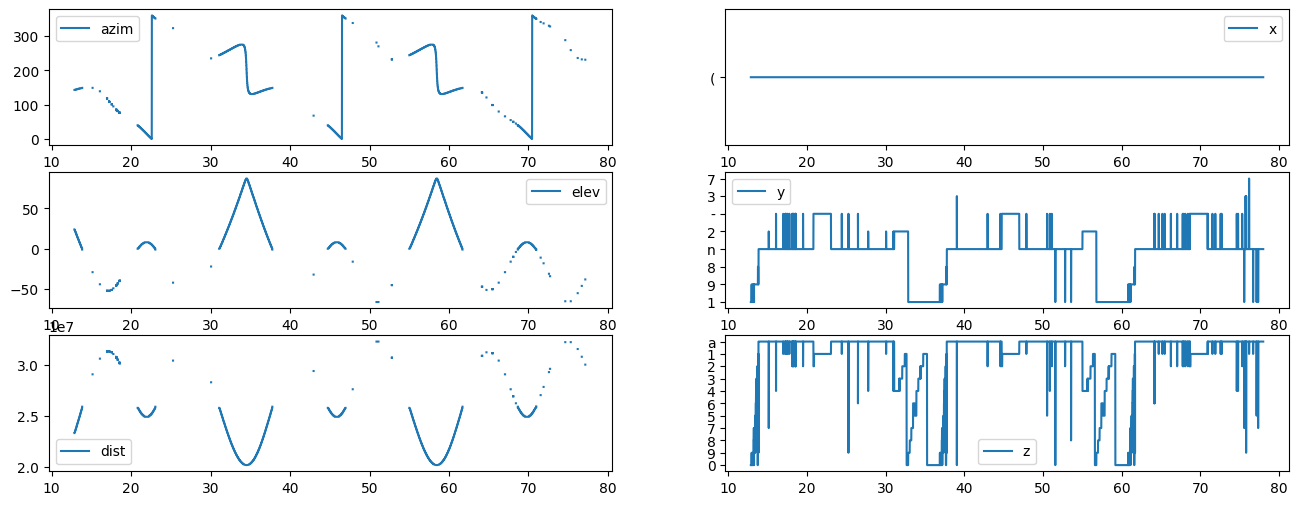

In [60]:
df = pd.read_csv('sat12.csv', sep=';')#, names=['tow', 'azim', 'elev', 'dist', 'x', 'y', 'z'], sep=';')
print(df.tail())
from math import atan, pi


fig, axs = plt.subplots(3, 2, figsize=(16, 6))
axs[0, 0].plot(df.TOW/3600, df.azim, label='azim')#, s=0.3)
axs[0, 0].legend()
axs[1, 0].plot(df.TOW/3600, df.elev, label='elev')#, s=0.3)
axs[1, 0].legend()
axs[2, 0].plot(df.TOW/3600, df.dist, label='dist')#, s=0.3)
axs[2, 0].legend()
axs[0, 1].plot(df.TOW/3600, df.ubx_ecef.apply(lambda x: x[0]), label='x')#, s=0.3)
axs[0, 1].legend()
axs[1, 1].plot(df.TOW/3600, df.ubx_ecef.apply(lambda x: x[1]), label='y')#, s=0.3)
axs[1, 1].legend()
axs[2, 1].plot(df.TOW/3600, df.ubx_ecef.apply(lambda x: x[2]), label='z')#, s=0.3)
axs[2, 1].legend()
plt.savefig('sat12dasd.png')
plt.show()


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
DF = pd.read_csv('sat_raw_calc_data.txt', sep=';', header=None,
                     names=['svId', 'gnssId', 'TOW', 'alm_x', 'alm_y', 'alm_z', 'eph_x', 'eph_y', 'eph_z',
                            'elev', 'azim', 'doMes', 'cpMes', 'prMes'])
DF = DF[DF.gnssId == 'GNSS.GPS']




C:\Users\kippe\AppData\Local\Temp\ipykernel_170088\3806937105.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


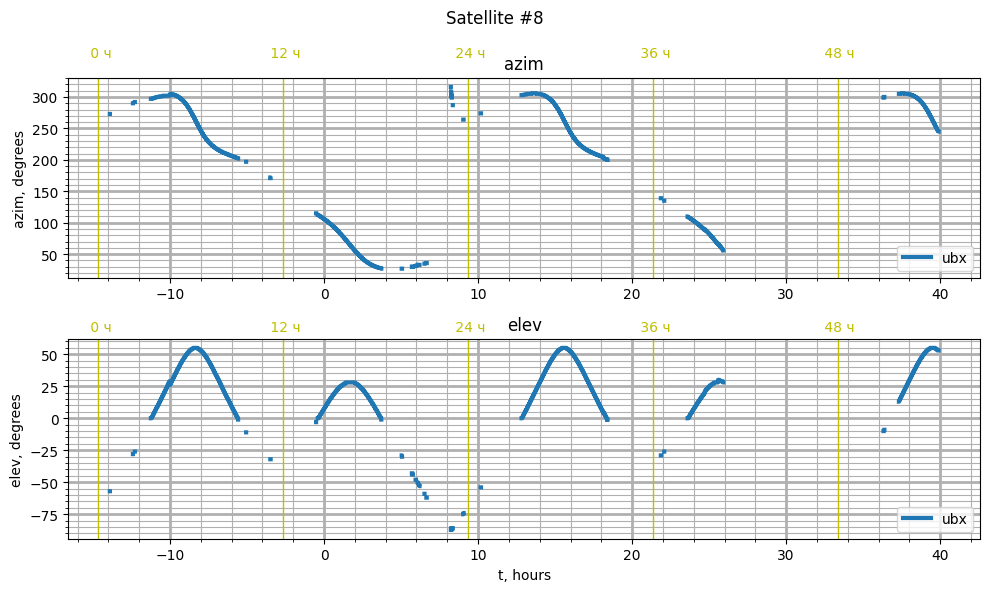

In [4]:
import pymap3d as pm
from Constants import LLA
from Constants import StartDate
from datetime import timedelta

NUM_SAT = 8
df = DF[DF.svId == NUM_SAT]
df = df[df.elev != -91]

# def func(row):
#     breakpoint()
#     res = pm.eci2aer(row.alm_x, row.alm_y, row.alm_z, *LLA, row.TOW/3600)
#     return res
# df['aer_alm'] = df.apply(func, axis=1)

# df['aer_alm'] = df.apply(
#     lambda row: pm.eci2aer(row.alm_x, row.alm_y, row.alm_z, *LLA, StartDate + timedelta(seconds=24*3600)), 
#     axis=1)
# df['aer_eph'] = df.apply(
#     lambda row: pm.eci2aer(row.eph_x, row.eph_y, row.eph_z, *LLA, StartDate + timedelta(seconds=24*3600)), 
#     axis=1)

df.loc[df['TOW'] > 50 * 3600, 'TOW'] -= 3600 * 24 * 7
htime = df.TOW / 3600

fig, axs = plt.subplots(2, figsize=(10, 6))
fig.suptitle(f'Satellite #{NUM_SAT}')

axs[0].plot(df.TOW/3600, df.azim, linewidth=3, label='ubx')#, s=0.3)
# axs[0].plot(df.TOW/3600, df.aer_alm.apply(lambda x: x[0]), linewidth=3, label='alm')#, s=0.3)
# axs[0].plot(df.TOW/3600, df.aer_eph.apply(lambda x: x[0]), linewidth=3, label='eph')#, s=0.3)
axs[0].legend()

axs[1].plot(df.TOW/3600, df.elev, linewidth=3, label='ubx')#, s=0.3)
# axs[1].plot(df.TOW/3600, df.aer_alm.apply(lambda x: x[1]), linewidth=3, label='alm')#, s=0.3)
# axs[1].plot(df.TOW/3600, df.aer_eph.apply(lambda x: x[1]), linewidth=3, label='eph')#, s=0.3)
axs[1].legend()

for i in range(2):
    ymax = axs[i].get_ylim()[1]
    for t in np.arange(min(htime), max(htime), 12.0):
        axs[i].axvline(x=t, color='y', linewidth=1)
        # axs[i].annotate(f'{round(t - min(htime)): 2} ч', (t, ymax*0.95), color='y')
        axs[i].text(t, ymax * 1.1, f'{round(t - min(htime)): 2} ч', color='y', ha='center')
    axs[i].grid(which='minor')
    axs[i].grid(which='major', linewidth=2)
    axs[i].minorticks_on()
axs[0].set_title('azim')
axs[1].set_title('elev')
axs[1].set_xlabel('t, hours')
axs[0].set_ylabel('azim, degrees')
axs[1].set_ylabel('elev, degrees')
plt.tight_layout()

plt.savefig('sat_azim_elev.png', dpi=600)
plt.show()

In [7]:
import pymap3d as pm
import numpy as np
from Transformations import *
from Constants import StartDate, LLA
from datetime import timedelta
lat = 10
lon = 15
# time = 3600 * 3

azim = 0
elev = 0
rad = 0

ecef1 = np.array(lla2ecef(lat, lon, 20e6))
# ecef1 = ecef2eci(time, *eci1)

print(f'ECEF from site LLA: {list(map(int, np.array(ecef1) / 1000))} km')

ecef2 = pm.aer2ecef(azim, elev, rad, *LLA)

print(f'ECEF from site AER: {list(map(int, np.array(ecef1) / 1000))} km')

ECEF from site LLA: [25092, 6723, 4573] km
ECEF from site AER: [25092, 6723, 4573] km


In [46]:
df = pd.read_csv('sat12.csv', sep=';')
df.head()

,Unnamed: 0,TOW,az,el,az_cor,el_cor
0,0,46308.999,143.0,24.0,315.253911,-29.621162
1,1,46309.999,143.0,24.0,315.249931,-29.619684
2,2,46311.000,143.0,24.0,315.245946,-29.618204
3,3,46312.000,143.0,24.0,315.241966,-29.616725
4,4,46313.000,143.0,24.0,315.237986,-29.615247


C:\Users\kippe\AppData\Local\Temp\ipykernel_49140\2947557027.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.htime = df.TOW / 3600


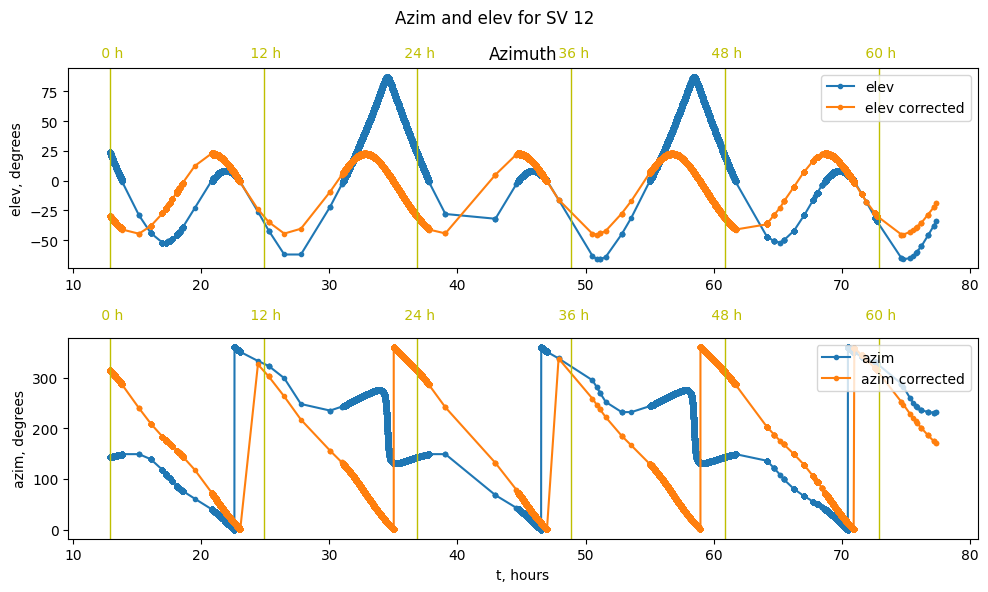

In [47]:
df.htime = df.TOW / 3600
fig, axs = plt.subplots(2, figsize=(10, 6))
fig.suptitle('Azim and elev for SV 12')

axs[0].plot(df.htime, df.el, label='elev', marker='.')
axs[1].plot(df.htime, df.az, label='azim', marker='.')
axs[0].plot(df.htime, df.el_cor, label='elev corrected', marker='.')
axs[1].plot(df.htime, df.az_cor, label='azim corrected', marker='.')

for i in range(2):
    ymax = axs[i].get_ylim()[1]
    for t in np.arange(min(df.htime), max(df.htime), 12.0):
        axs[i].axvline(x=t, color='y', linewidth=1)
        # axs[i].annotate(f'{round(t - min(htime)): 2} ч', (t, ymax*0.95), color='y')
        axs[i].text(t, ymax * 1.1, f'{round(t - min(df.htime)): 2} h', color='y', ha='center')
axs[0].legend(loc='upper right')
axs[1].legend(loc='upper right')
axs[0].set_title('Elevation')
axs[0].set_title('Azimuth')
axs[1].set_xlabel('t, hours')
axs[0].set_ylabel('elev, degrees')
axs[1].set_ylabel('azim, degrees')
plt.tight_layout()
plt.savefig('sat12.png', dpi=500)
plt.show()


In [186]:
from datetime import datetime, timedelta
from math import pi, sqrt, sin, atan, atan2, cos, tan

import numpy as np
alm = [8, 2310, 147456, 0.009456157684326172, 0.0035114288330078125, -2.5247572921216488e-09, 5153.56689453125, 0.5389893054962158, 0.11286938190460205, 0.7948415279388428, 0.0001239776611328125, 2.1827872842550278e-11, 0, 1, datetime.now()]
eph = [8, 261, 583200, 583200, 27, 27, 10, 6.707523425575346e-12, -2.567389856267255e-09, 109.90625, 287.1875, 4.697591066360474e-06, 5.5730342864990234e-06, -8.754432201385498e-08, -1.0803341865539551e-07, 1.4808847481617704e-09, 0.3035227810032666, 0.009448226657696068, 5153.622440338135, 0.9459900539368391, 0.5777560574933887, 0.1125011807307601, 4.6566128730773926e-09, 0.0, 2.319211489520967e-11, 0.00011975038796663284, 0, 0, datetime.now()]
alm = [9, 2310, 147456, 0.002669811248779297, 0.004894256591796875, -2.4883775040507317e-09, 5153.63623046875, -0.4582533836364746, 0.6358199119567871, 0.940352201461792, 0.00016117095947265625, 1.4551915228366852e-11, 0, 1, datetime.now()]

alm =[9, 2310, 233472, 0.0026683807373046875, 0.0048961639404296875, -2.5029294192790985e-09, 5153.63623046875, -0.4584728479385376, 0.635661244392395, 0.9340482950210571, 0.00016307830810546875, 1.4551915228366852e-11, 0, 1, datetime.now()]

eph =[9, 262, 0, 0, 74, 74, 2, 7.537437340943143e-11, -2.543060872994829e-09, -25.65625, 221.875, 8.085742592811584e-06, -1.4491379261016846e-06, -7.264316082000732e-08, -3.5390257835388184e-08, 1.463831722503528e-09, 0.3048875015228987, 0.0026726502692326903, 5153.685857772827, 0.09409773629158735, -0.4578785211779177, 0.6360140475444496, 9.313225746154785e-10, 0.0, 1.3642420526593924e-11, 0.00015946431085467339, 0, 0, datetime.now()]

def check_t(time, *args, **kwargs):
    half_week = 302400.0
    if time > half_week:
        time -= 2 * half_week
    elif time < - half_week:
        time += 2 * half_week
    return time


In [3]:
def calc_sat_alm(ALM: list, time, N):
    # SV_ID, week, Toa, e, delta_i, Wdot, sqrtA, W0, w, M0, af0, af1, health, Data_ID, receiving_time = ALM
    SV_ID = ALM[0]  # ID спутника
    N0a = ALM[1]  # номер недели передаваемых данных
    Toa = ALM[2]  # опорное время внутри недели N, на которую передаются данные альманах
    e = ALM[3]  # эксцентриситет
    di = ALM[4] * pi  # rad, поправка к наклонению
    OmegaDot = ALM[5] * pi  # rad/s, скорость прецессии орбиты
    sqrtA = ALM[6]  # корень из большей полуоси
    Omega0 = ALM[7] * pi  # rad Угол восходящего узла на момент начала недели N
    omega = ALM[8] * pi  # rad аргумент перигея
    M0 = ALM[9] * pi  # rad средняя аномалия на эпоху Toa
    af0 = ALM[10]  #
    af1 = ALM[11]  #
    health = ALM[12]  #
    Data_ID = ALM[13]  #
    receiving_time: datetime = ALM[14]  # время принятия сигнала

    mu = 3.9860044 * 1e14  # m^3/s^2 гравитационная постоянная для земли WGS-84
    OmegaEathDot = 7.2921151467 * 10e-5  # rad/s скорость вращения земли WGS-84
    i0 = 0.30 * pi  # rad

    a = sqrtA ** 2  # большая полуось
    n0 = sqrt(mu / a ** 3)  # rad/s вычисленное среднее перемещение

    t = time
    # TODO: добавить поправки генераторов
    tk = (N - N0a) * 604800 + time - Toa#+ 3600 * 6

    Mk = M0 + n0 * tk  # средняя аномалия
    ## Решение уравнения Mk = Ek - e * sin(Ek)
    Ek = Mk  # rad
    for i in range(20):
        Ek = Ek + (Mk - Ek + e * sin(Ek)) / (1 - e * cos(Ek))
    nu_k = atan2(
        sqrt(1 - e * e) * sin(Ek) / (1 - e * cos(Ek)),
        (cos(Ek) - e) / (1 - e * cos(Ek))
    )
    r_k = a * (1 - e * cos(Ek))
    ik = i0 + di
    Omega_k = Omega0 + (OmegaDot - OmegaEathDot) * tk - OmegaEathDot * Toa
    p = a * (1 - e * e)
    Vr = sqrt(mu / p) * e * sin(nu_k)
    Vn = sqrt(mu / p) * (1 + e * cos(nu_k))
    u_k = omega + nu_k

    X = r_k * (cos(u_k) * cos(Omega_k) - sin(u_k) * sin(Omega_k) * cos(ik))
    Y = r_k * (cos(u_k) * sin(Omega_k) + sin(u_k) * cos(Omega_k) * cos(ik))
    Z = r_k * sin(u_k) * sin(ik)


    V0x = Vr * (cos(u_k) * cos(Omega_k) - sin(u_k) * sin(Omega_k) * cos(ik)) \
          - Vn * (sin(u_k) * cos(Omega_k) + cos(u_k) * sin(Omega_k) * cos(ik))
    V0y = Vr * (cos(u_k) * sin(Omega_k) + sin(u_k) * cos(Omega_k) * cos(ik)) \
          - Vn * (sin(u_k) * sin(Omega_k) - cos(u_k) * cos(Omega_k) * cos(ik))
    V0z = Vr * sin(u_k) * sin(ik) \
          + Vn * cos(u_k) * sin(ik)

    Vx = V0x + 0*OmegaEathDot * Y
    Vy = V0y - 0*OmegaEathDot * X
    Vz = V0z
    return (X, Y, Z, Vx, Vy, Vz)

In [245]:
ALM = alm
time = 3600 * 4
N = 2310

SV_ID = ALM[0]  # ID спутника
N0a = ALM[1]  # номер недели передаваемых данных
Toa = ALM[2]  # опорное время внутри недели N, на которую передаются данные альманах
e = ALM[3]  # эксцентриситет
di = ALM[4] * pi  # rad, поправка к наклонению
OmegaDot = ALM[5] * pi * (3600*24)  # rad/s, скорость прецессии орбиты
sqrtA = ALM[6]  # корень из большей полуоси
Omega0 = ALM[7] * pi  # rad Угол восходящего узла на момент начала недели N
omega = ALM[8] * pi  # rad аргумент перигея
M0 = ALM[9] * pi  # rad средняя аномалия на эпоху Toa
af0 = ALM[10]  #
af1 = ALM[11]  #
health = ALM[12]  #
Data_ID = ALM[13]  #
receiving_time: datetime = ALM[14]  # время принятия сигнала

mu = 3.9860044 * 1e14  # m^3/s^2 гравитационная постоянная для земли WGS-84
OmegaEathDot = 7.2921151467 * 10e-5 # rad/s скорость вращения земли WGS-84
i0 = 0.30 * pi  # rad

a = sqrtA ** 2  # большая полуось
n0 = sqrt(mu / a ** 3)  # rad/s вычисленное среднее перемещение
t = time
# TODO: добавить поправки генераторов
tk = (N - N0a) * 604800 + time - Toa#+ 3600 * 6

Mk = M0 + n0 * tk  # средняя аномалия

## Решение уравнения Mk = Ek - e * sin(Ek)
Ek = Mk  # rad
for i in range(20):
    Ek = Ek + (Mk - Ek + e * sin(Ek)) / (1 - e * cos(Ek))
    # Ek = Mk - e * sin(Ek)
# print((Ek % pi) / pi * 180)
nu_k = atan2(
    sqrt(1 - e * e) * sin(Ek),# / (1 - e * cos(Ek)),
    (cos(Ek) - e)# / (1 - e * cos(Ek))
)
r_k = a * (1 - e * cos(Ek))
ik = i0 + di
Omega_k = Omega0 + (OmegaDot - OmegaEathDot) * tk - OmegaEathDot * Toa #- 0.095*OmegaEathDot * time

u_k = omega + nu_k

X = r_k * (cos(u_k) * cos(Omega_k) - sin(u_k) * sin(Omega_k) * cos(ik))
Y = r_k * (cos(u_k) * sin(Omega_k) + sin(u_k) * cos(Omega_k) * cos(ik))
Z = r_k * sin(u_k) * sin(ik)
# print(tk)
# print(time)
# print(r_k)
# print(cos(u_k))
# print(sin(u_k)  * cos(ik))
print(X, Y, Z)
# for TOW = 4 Omega_k = -1.6905563119681734 или -0.421244997364088 радиан или 96.86 или -24.14 градуса
# print(Omega_k)
# print((Omega_k*180/pi) % 360)
# import pymap3d as pm
# print(pm.eci2ecef(X, Y, Z, datetime(2024, 4, 14, 7, 0, 0)))

-16064521.467361048 4657822.309377097 -20698882.08704459
136.89196972358624
283.33211439413844


In [187]:
EPH = eph
# time = 576018 # 60 градусов
time = 2 * 3600

# SV_ID = EPH[0]
# Noe = EPH[1]
Toe = EPH[2]
# Toc = EPH[3]
# IODE1 = EPH[4]
# IODE2 = EPH[5]
# IODC = EPH[6]
IDOT = 0#EPH[7] * pi
OmegaDot = EPH[8] * pi
Crs = 0#EPH[9]
Crc = 0#EPH[10]
Cus = 0#EPH[11]
Cuc = 0#EPH[12]
Cis = 0#EPH[13]
Cic = 0#EPH[14]
dn = 0#EPH[15] * pi
i0 = EPH[16] * pi
e = EPH[17]
sqrtA = EPH[18]
M0 = EPH[19] * pi
Omega0 = EPH[20] * pi 
omega = EPH[21] * pi
# Tgd = EPH[22]
# af2 = EPH[23]
# af1 = EPH[24]
# af0 = EPH[25]
# health = EPH[26]
# accuracy = EPH[27]
# receiving_time = EPH[28]

# print(M0 / pi * 180)

mu = 3.9860044 * 1e14  # m^3/s^2 гравитационная постоянная для земли WGS-84
OmegaEathDot = 7.2921151467 * 10e-5  # rad/s скорость вращения земли WGS-84

a = sqrtA ** 2  # большая полуось
n0 = sqrt(mu / a ** 3)  # rad/s вычисленное среднее перемещение
n = n0 + dn  # скорректированное средне движение
t = time
# TODO: добавить поправки генераторов
tk = 0 * 604800 + time - Toe

Mk = M0 + n * tk  # средняя аномалия
## Решение уравнения Mk = Ek - e * sin(Ek)
Ek = Mk  # rad
for i in range(20):
    Ek = Ek + (Mk - Ek + e * sin(Ek)) / (1 - e * cos(Ek))
nu_k = atan2(
    sqrt(1 - e * e) * sin(Ek) ,
    (cos(Ek) - e) 
)
# nu_k = 2 * atan( sqrt((1+e)/(1-e)) * tan(Ek/2) )
Phi_k = nu_k + omega  # аргумент lat
r_k = a * (1 - e * cos(Ek))
ik = i0 + IDOT * tk
# print(tk)
Omega_k = Omega0 + (OmegaDot - OmegaEathDot) * tk - OmegaEathDot * Toe #+OmegaEathDot * time#-0.1* OmegaEathDot * time #+0.9* OmegaEathDot * time

# print(f'Omega_k нужное =~ {(Omega_k * 180/pi)} градусов')
# print(f'Omega0 = {(Omega0 * 180/pi)} градусов')
# print(f'dOmega * tk = {((OmegaDot - OmegaEathDot) * tk * 180 / pi)} градусов')
# print(f'OmegaEath = {(OmegaEathDot * Toe * 180/pi)} градусов')
# print(f'Сумма = {((Omega0 + (OmegaDot - OmegaEathDot) * tk - OmegaEathDot * Toe)*180/pi)}')
# print(f'(OmegaDot - OmegaEathDot) = {((OmegaDot - OmegaEathDot)*180/pi)} градусов/сек')

# print((Omega_k * 180/pi))
# print((Omega0 + (OmegaDot - OmegaEathDot) * tk - OmegaEathDot * Toe))
# print((Omega0 * 180/pi))
# print(((OmegaDot - OmegaEathDot) * tk * 180 / pi))
# print((OmegaEathDot * Toe * 180/pi))
# print((0.9 * OmegaEathDot * time * 180/pi))
# 
# print( (
#     (0.9 * OmegaEathDot * time) +
#     Omega_k + Omega_k 
# 
# )*180/pi % 360)

du_k = Cuc * cos(2 * Phi_k) + Cus * sin(2 * Phi_k)
dr_k = Crc * cos(2 * Phi_k) + Crs * sin(2 * Phi_k)
di_k = Cic * cos(2 * Phi_k) + Cis * sin(2 * Phi_k)

u_k = Phi_k + du_k
r_k = r_k + dr_k
ik = ik + di_k

X = r_k * (cos(u_k) * cos(Omega_k) - sin(u_k) * sin(Omega_k) * cos(ik))
Y = r_k * (cos(u_k) * sin(Omega_k) + sin(u_k) * cos(Omega_k) * cos(ik))
Z = r_k * sin(u_k) * sin(ik)

(X, Y, Z)

(-25108769.84405384, 7360267.521389156, -4472527.762249259)

In [53]:
print(Toe)
print(n)
print(dn)
print(n0)
print(M0)

583200
0.00014586293347136346
4.652336645638189e-09
0.0001458582811347178
2.9719154038169857


In [63]:
EPH


[8,
 261,
 583200,
 583200,
 27,
 27,
 10,
 6.707523425575346e-12,
 -2.567389856267255e-09,
 109.90625,
 287.1875,
 4.697591066360474e-06,
 5.5730342864990234e-06,
 -8.754432201385498e-08,
 -1.0803341865539551e-07,
 1.4808847481617704e-09,
 0.3035227810032666,
 0.009448226657696068,
 5153.622440338135,
 0.9459900539368391,
 0.5777560574933887,
 0.1125011807307601,
 4.6566128730773926e-09,
 0.0,
 2.319211489520967e-11,
 0.00011975038796663284,
 0,
 0,
 datetime.datetime(2024, 4, 13, 23, 20, 50, 443019)]

In [77]:
EPH = eph
time = 576018

SV_ID = EPH[0]
Noe = EPH[1]
Toe = EPH[2]
Toc = EPH[3]
IODE1 = EPH[4]
IODE2 = EPH[5]
IODC = EPH[6]
IDOT = EPH[7] * pi
OmegaDot = EPH[8] * pi
Crs = EPH[9]
Crc = EPH[10]
Cus = EPH[11]
Cuc = EPH[12]
Cis = EPH[13]
Cic = EPH[14]
dn = EPH[15] * pi
i0 = EPH[16] * pi
e = EPH[17]
sqrtA = EPH[18]
M0 = EPH[19] * pi
Omega0 = EPH[20] * pi
omega = EPH[21] * pi
Tgd = EPH[22]
af2 = EPH[23]
af1 = EPH[24]
af0 = EPH[25]
health = EPH[26]
accuracy = EPH[27]
receiving_time = EPH[28]


mu = 3.9860044 * 1e14  # m^3/s^2 гравитационная постоянная для земли WGS-84
OmegaEathDot = 7.2921151467 * 10e-5  # rad/s скорость вращения земли WGS-84
# F = - 4.442807633e-10 #???

a = sqrtA ** 2  # большая полуось
n0 = sqrt(mu / a ** 3)  # rad/s вычисленное среднее перемещение
n = n0 + dn  # скорректированное средне движение

# TODO: добавить поправки генераторов
# tk = 0 * 604800 + time - Toe
dt = check_t(time - Toc)
satNr = (af2 * dt + af1) * dt + af0 - Tgd
time = time - satNr
tk = check_t(time - Toe)

Mk = M0 + n * tk  # средняя аномалия
## Решение уравнения Mk = Ek - e * sin(Ek)
Ek = Mk  # rad
for i in range(20):
    # Ek = Ek + (Mk - Ek + e * sin(Ek)) / (1 - e * cos(Ek))
    Ek = Mk + e*sin(Ek)
# Ek = np.remainder(Ek + 2*pi, 2*pi) # to 0-360

nu_k = atan2(
    sqrt(1 - e * e) * sin(Ek),# / (1 - e * cos(Ek)),
    (cos(Ek) - e) #/ (1 - e * cos(Ek))
)
Phi_k = nu_k + omega  # аргумент lat
# Phi_k = np.remainder(Phi_k + 2*pi, 2*pi)

r_k = a * (1 - e * cos(Ek))
ik = i0 + IDOT * tk
Omega_k = Omega0 + (OmegaDot - OmegaEathDot) * tk - OmegaEathDot * Toe
du_k = Cuc * cos(2 * Phi_k) + Cus * sin(2 * Phi_k)
dr_k = Crc * cos(2 * Phi_k) + Crs * sin(2 * Phi_k)
di_k = Cic * cos(2 * Phi_k) + Cis * sin(2 * Phi_k)

u_k = Phi_k + du_k
r_k = r_k + dr_k
ik = ik + di_k

X = r_k * (cos(u_k) * cos(Omega_k) - sin(u_k) * sin(Omega_k) * cos(ik))
Y = r_k * (cos(u_k) * sin(Omega_k) + sin(u_k) * cos(Omega_k) * cos(ik))
Z = r_k * sin(u_k) * sin(ik)

(X, Y, Z)

(11911916.422908135, -17421205.03104905, 16271376.607549923)

Moscow time: 5:00
UTC time: 2:00
ECEF from site LLA: [6990, 25036, -4482] km
ECEF from site AER: [6438, 24904, -4610] km
ECEF from ALM: [-6543, 25333, -4473]


TypeError: 'Time' object cannot be interpreted as an integer

In [ ]:
import ephem

almanac_data = {
    'name': 'GPS BIIF-10 (PRN 08)  ',
    'line1': '1 40730U 15033A   24103.98788303 -.00000039  00000+0  00000+0 0  9993',
    'line2':  '2 40730  54.6543 299.7108 0093844  18.7975 341.5498  2.00570312 64042'
}

satellite = ephem.readtle(almanac_data['name'], almanac_data['line1'], almanac_data['line2'])

observer = ephem.Observer()
breakpoint()
observer.date = ephem.now()

satellite.compute(observer)


from skyfield.api import EarthSatellite, Topos, load
ts = load.timescale()
# satellite = EarthSatellite(almanac_data['line1'], almanac_data['line2'], almanac_data['name'], ts)
# satellite = ts.almanac(**almanac_data)
t = ts.utc(2024, 4, 13, 20, 0, 0)
# print(t[0])
print(t)
# print(ts.gps_time(t))
print(satellite.at(t).position.km)


**Построение графиков координат, рассчитанных по данным альманах для спутника №2**

38267.000290321
end time: 889892.999544218
2024-04-21 00:00:00+02:30
2024-04-21 10:37:47+02:30
[10.629722302866943, 36.368662225545556, 46.683471022215, 79.19249987339388]


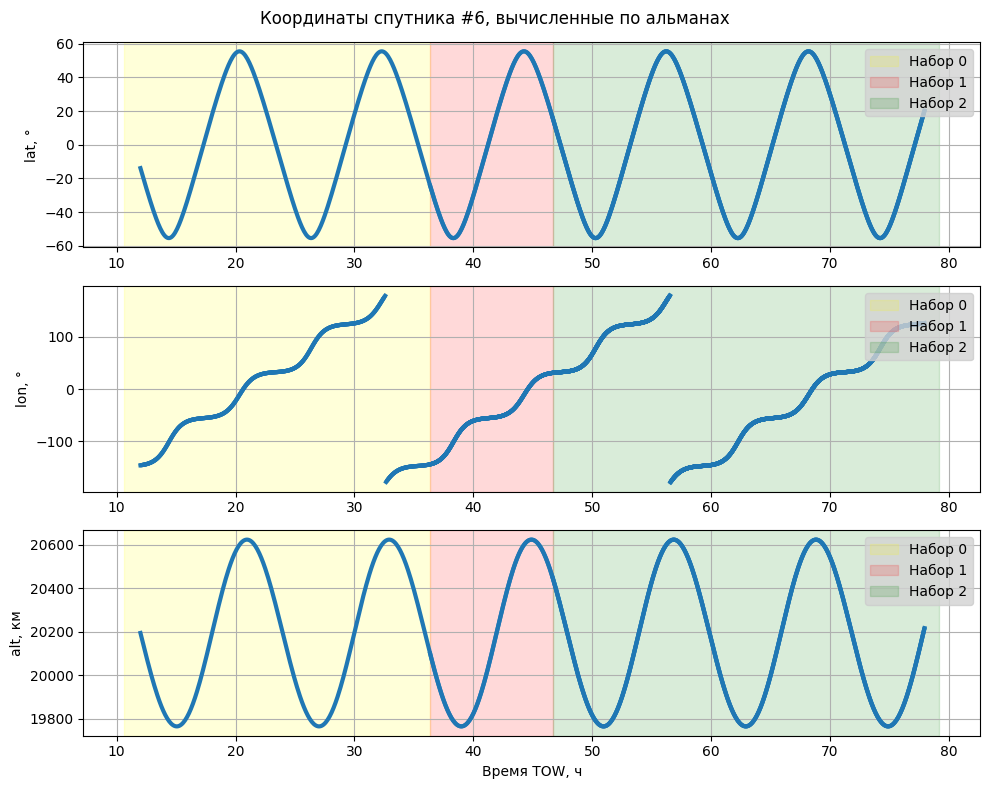

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import SatellitesCoordinateCalculator as SCC
from Transformations import eci2ecef, lla2ecef
import Constants
from datetime import datetime, timedelta
import pymap3d as pm
from pytz import timezone

delta_time = 5 * 60
day = 24 * 3600
week = 7 * day
if True:
    WEEK = 2303
    alm = [
        # [2, 2302, 405504, 0.01619100570678711, 0.00804901123046875, -2.470187610015273e-09, 5153.66845703125, -0.8253982067108154, -0.39306819438934326, 0.23919737339019775, -0.00048160552978515625, 7.275957614183426e-12, 0, 1, 233797.999753797, 2302],
        # [2, 2302, 503808, 0.01618480682373047, 0.008054733276367188, -2.448359737172723e-09, 5153.66943359375, -0.825646162033081, -0.3928016424179077, 0.8028857707977295, -0.00048065185546875, 7.275957614183426e-12, 0, 1, 282415.00022231, 2302],
        # [2, 2303, 147456, 0.016164779663085938, 0.008062362670898438, -2.4301698431372643e-09, 5153.669921875, -0.8645974397659302, -0.39210712909698486, 0.33686935901641846, -0.00047969818115234375, 7.275957614183426e-12, 0, 1, 557776.000445405, 2302],
        [2, 2303, 233472, 0.0161590576171875, 0.008062362670898438, -2.4374458007514477e-09, 5153.66943359375, -0.8648117780685425, -0.3919109106063843, 0.3301318883895874, -0.0004787445068359375, 7.275957614183426e-12, 0, 1, 38267.000290321, 2303],
        [2, 2303, 319488, 0.016153812408447266, 0.008062362670898438, -2.4556356947869062e-09, 5153.66845703125, -0.8650273084640503, -0.39172470569610596, 0.32340574264526367, -0.0004787445068359375, 7.275957614183426e-12, 0, 1, 130927.18401196401, 2303],
        [2, 2303, 405504, 0.016150474548339844, 0.008056640625, -2.4774635676294565e-09, 5153.6669921875, -0.8652441501617432, -0.39154016971588135, 0.31668365001678467, -0.00047779083251953125, 7.275957614183426e-12, 0, 1, 168060.495679974, 2303],
        [2, 2303, 503808, 0.016147613525390625, 0.008056640625, -2.499291440472007e-09, 5153.666015625, -0.8654934167861938, -0.3913484811782837, 0.8804515600204468, -0.000476837158203125, 7.275957614183426e-12, 0, 1, 285092.999544218, 2303],
        ]
else:
    WEEK = 2310
    alm = [
        # [2, 2310, 61440, 0.01603984832763672, 0.008001327514648438, -2.5283952709287405e-09, 5153.6591796875, 0.8565354347229004, -0.38335108757019043, 0.8882302045822144, -0.00045299530029296875, 7.275957614183426e-12, 0, 1, 465096, 2309],
        # [2, 2310, 147456, 0.0160369873046875, 0.008001327514648438, -2.5065673980861902e-09, 5153.65966796875, 0.85631263256073, -0.3831392526626587, 0.8815017938613892, -0.00045299530029296875, 7.275957614183426e-12, 0, 1, 528810, 2309],
        [2, 2310, 233472, 0.016033172607421875, 0.008001327514648438, -2.48473952524364e-09, 5153.66064453125, 0.8560917377471924, -0.3829275369644165, 0.8747718334197998, -0.0004520416259765625, 7.275957614183426e-12, 0, 1, 31562, 2310],
        [2, 2310, 319488, 0.016028404235839844, 0.00800323486328125, -2.4629116524010897e-09, 5153.66162109375, 0.855872631072998, -0.3827226161956787, 0.8680468797683716, -0.0004520416259765625, 7.275957614183426e-12, 0, 1, 93848, 2310],
        [2, 2310, 589824, 0.016012191772460938, 0.007997512817382812, -2.4374458007514477e-09, 5153.662109375, 0.8551934957504272, -0.3822040557861328, -0.5815439224243164, -0.00045013427734375, 7.275957614183426e-12, 0, 1, 462075, 2310],
    ]

# WEEK = 2311
# alm = [
#     # [2, 2310, 589824, 0.016012191772460938, 0.007997512817382812, -2.4374458007514477e-09, 5153.662109375, 0.8551934957504272, -0.3822040557861328, -0.5815439224243164, -0.00045013427734375, 7.275957614183426e-12, 0, 1, datetime(2024, 4, 19, 11, 27, 8, 565488, tzinfo=timezone('Europe/Moscow')), ],
#     [2, 2312, 61440, 0.01599740982055664, 0.007951736450195312, -2.557499101385474e-09, 5153.65576171875, 0.7767853736877441, -0.38106489181518555, -0.9557061195373535, -0.00044536590576171875, 7.275957614183426e-12, 0, 1, datetime(2024, 4, 26, 2, 35, 57, 678175, tzinfo=timezone('Europe/Moscow')), 119.5*3600, 2311],
#     [2, 2312, 147456, 0.015996456146240234, 0.0079498291015625, -2.5429471861571074e-09, 5153.65673828125, 0.7765601873397827, -0.3808877468109131, -0.9623928070068359, -0.00044536590576171875, 7.275957614183426e-12, 0, 1, datetime(2024, 4, 27, 2, 46, 0, 656446, tzinfo=timezone('Europe/Moscow')), 143.5*3600, 2311]
# ]


def get_tow(alm):
    return alm[-2] + (alm[-1] - WEEK)*24*7*3600
# print(alm[0])
start_time = get_tow(alm[0])
end_time = get_tow(alm[-1]) + 1 * 24 * 7 *3600
print(start_time)
print(f'end time: {end_time}')
start_dt = datetime(2024, 4, 21, tzinfo=Constants.tz_moscow)
print(start_dt)
fig, axs = plt.subplots(3, figsize=(10, 8))

T0 = start_time / 3600
print(start_dt + timedelta(seconds=int(start_time)))


def plot_threshold(axs, x, y, threshold, **kwargs):
    for i in range(len(x) - 1):
        if abs(y[i + 1] - y[i]) < threshold:
            axs.plot([x[i], x[i + 1]], [y[i], y[i + 1]], **kwargs)

tows = []
for i, a in enumerate(alm):
    tow = get_tow(a)
    tows.append(tow/3600)
    X, Y, Z = [], [], []
    
    TIME = np.arange(max(12*3600, tow), min(end_time, 78*3600), delta_time)
    # print(TIME)
    for time in TIME:
        t = time
        if time > week:
            N = WEEK + 1
            time -= week
        else:
            N = WEEK
        xyz = SCC.calc_sat_alm(a, time, N, 1.1)
        xyz = eci2ecef(t, *xyz)
        # print(t)
        # print(timedelta(seconds=(it))
        # xyz = pm.eci2geodetic(*xyz, start_dt + timedelta(seconds=int(time)))
        # xyz = pm.eci2lla(*xyz, start_dt + timedelta(seconds=int(time)))
        # print(time)
        # xyz = pm.eci2ecef(*xyz, start_dt + timedelta(seconds=int(time)))
        # xyz = pm.geodetic2ecef(*xyz)
        xyz = pm.ecef2geodetic(*xyz)
        # xyz = lla2ecef(*xyz)
        
        X.append(xyz[0])
        Y.append(xyz[1])
        Z.append(xyz[2])
    # print('Calculated')
    T0=0
    
    # lw = 4 if i%2 == 0 else 2
    # ls = '-' if i%2 == 0 else '--'
    # c = 'tab:blue' if i%2 == 0 else 'yellow'
    lw = 3
    c = 'tab:blue'
    ls = '-'
    axs[0].plot(TIME/3600-T0, np.array(X)/1, linewidth=lw, color=c, linestyle=ls)
    # plot_threshold(axs[0], TIME/3600-T0, np.array(X)/1, 1e4, label=a[-2], linewidth=lw, color=c, linestyle=ls)
    # axs[1].plot(TIME/3600-T0, np.array(Y)/1, label=a[-2], linewidth=3)
    plot_threshold(axs[1], TIME/3600-T0, np.array(Y)/1, 90, linewidth=lw, color=c, linestyle=ls)
    # axs[1].scatter(TIME/3600-T0, np.array(Y)/1, label=a[-2], s=2)
    axs[2].plot(TIME/3600-T0, np.array(Z)/1000, linewidth=lw, color=c, linestyle=ls)
    # plot_threshold(axs[2], TIME/3600-T0, np.array(Z)/1000, 1e4,  label=a[-2], linewidth=lw, color=c, linestyle=ls)
    a = 0

# tows.append(78)
print(tows)
for i in range(3):
    # axs[i].legend()
    # axs[i].set_xlim([12, 78])
    axs[i].grid()
    axs[i].set_ylabel(f'{['lat, °', 'lon, °', 'alt, км'][i]}')  
    for j in range(len(tows)-1):
        # print(tows[j], tows[j+1])
        axs[i].axvspan(tows[j], tows[j+1], alpha=0.15, color= ['yellow', 'red', 'green', 'gray'][j], label=f'Набор {j}')
    # if i == 0:
    axs[i].legend(loc='upper right', facecolor='lightgrey')
plt.xlabel('Время TOW, ч')
fig.suptitle(f"Координаты спутника #{6}, вычисленные по альманах")
plt.tight_layout()    

plt.savefig('ALM_lla.png', dpi=600)
plt.show()




In [2]:
import numpy as np
import matplotlib.pyplot as plt
import SatellitesCoordinateCalculator as SCC
from Transformations import eci2ecef, lla2ecef
import Constants
from datetime import datetime, timedelta
import pymap3d as pm

In [ ]:
import json
with open('eph2.txt', 'r') as file:
    lines = file.readlines()
    
eph = []
for line in lines:
    s = line.split("\'eph\': ")[1].replace('}\n', '')
    eph.append(ast.loads(s))
print(eph)


In [27]:
with open('eph2.txt', 'r') as file:
    lines = file.readlines()
    
with open('eph2_mod.py', 'w') as file:
    print(
'''
import datetime
eph = [
''', end = '', file=file)
    for line in lines:
        s = line.split("\'eph\': ")[1].replace('}\n', ',')
        print(s, file=file)
    print(']', file=file)


2024-04-25 20:53:36.037352+02:30
[[2, 2311, 410400, 410400, 46, 46, 218, -8.947154128691182e-11, -2.5041799744940363e-09, -113.75, 301.5625, 4.04752790927887e-06, -5.636364221572876e-06, 2.0489096641540527e-07, 1.2479722499847412e-07, 1.389821591146756e-09, 0.30796506348997355, 0.01599640806671232, 5153.706750869751, -0.8331034458242357, 0.8157880217768252, -0.38163436483591795, 1.0151416063308716e-07, 0.0, 6.59383658785373e-12, -0.0004471931606531143, 0, 0, datetime.datetime(2024, 4, 25, 20, 54, 50, 71124, tzinfo=<DstTzInfo 'Europe/Moscow' LMT+2:30:00 STD>)], [2, 2311, 489600, 489600, 79, 79, 218, -1.2960299500264227e-10, -2.5461304176133126e-09, -91.4375, 328.4375, 2.598389983177185e-06, -4.513189196586609e-06, 2.60770320892334e-08, 3.203749656677246e-07, 1.4085799193708226e-09, 0.3079584389925003, 0.015996302478015423, 5153.707927703857, 0.8437887243926525, 0.8155809198506176, -0.38148402562364936, 1.0151416063308716e-07, 0.0, 6.59383658785373e-12, -0.00044667068868875504, 0, 0, dat

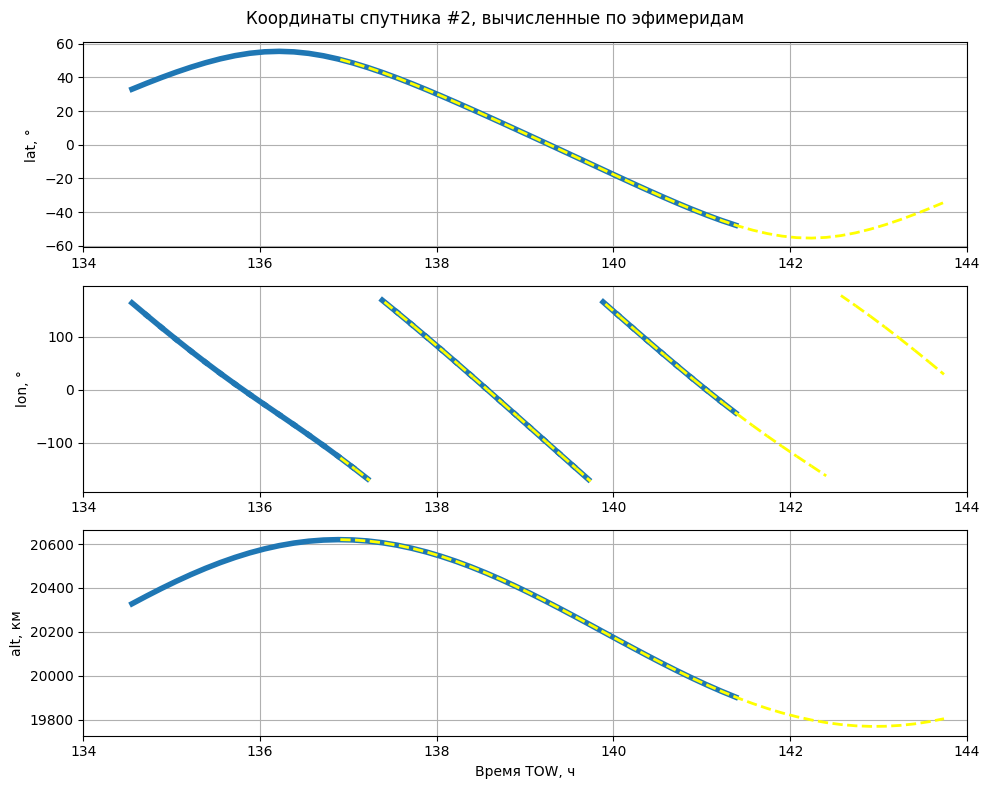

In [56]:
# from e5eph2_mod5 import eph
# from eph2_mod import eph
from eph2txtlog import eph
from pytz import timezone
t1 = eph[0][-1]
t2 = eph[-1][-1]
start_dt = datetime(1980, 1, 6, tzinfo=timezone('Europe/Moscow'))
# for e in eph:
#     t = e[-1].s
# print(eph[0])
# Dt = t1-start_dt
# print(eph[0][1]+2048)
# print(Dt.days // 7)
# print(Dt.days%7 * 24*3600 + Dt.seconds)

fig, axs = plt.subplots(3, figsize=(10, 8))

Dt_end = t2 - start_dt 
t_end = Dt_end.days%7 * 24*3600 + Dt_end.seconds
delta_time = 10 * 60

print(t1)

# EPH = eph
EPH = []
last = [1, 2]
for e in eph[1:]:
    # if e[1] == 255:
    #     continue
    if e[:-1] != last[:-1]:
        EPH.append(e)
    # print(e[:-1] == last[:-1])
    last = e
print(EPH)
print(len(EPH))
T0 = None
for i, e in enumerate(EPH):
    t = e[-1]
    # if t < datetime(2024, 2, 3):
    #     continue
    Dt = t-start_dt
    tow = Dt.days%7 * 24*3600 + Dt.seconds
    if i == 3:
        T0 = tow/3600
    T0 = 0
    # if tow > 20 * 3600:
    #     continue
    X, Y, Z = [], [], []
    X1, Y1, Z1 = [], [], []
    # print(tow)
    TIME = np.arange(tow, tow + 7 * 3600 + 0 *min(1000*3600, tow + 50*3600, t_end + 30*3600), delta_time) - 3 * 3600
    
    # print(TIME)
    for time in TIME:
        # if time > 20:
        #     break
        xyz = SCC.calc_sat_eph(e, time, 2023, 1)
        # xyz1 = SCC.calc_sat_eph(e, time, 2023, 1.1)
        # xyz = eci2ecef(time*1, *xyz)
        # xyz1 = eci2ecef(time*1.1, *xyz1)
        
        
        
        # print(t)
        # print(timedelta(seconds=(it))
        xyz = pm.eci2geodetic(*xyz, start_dt + timedelta(seconds=int(time)))
        # xyz = pm.eci2geodetic(*xyz, start_dt + timedelta(seconds=int(time)))
        # xyz = pm.eci2lla(*xyz, start_dt + timedelta(seconds=int(time)))
        # print(time)
        # xyz = pm.eci2ecef(*xyz, t + timedelta(seconds=int(time)))
        # xyz = pm.geodetic2ecef(*xyz)
        # xyz = lla2ecef(*xyz)
        
        X.append(xyz[0])
        # X1.append(xyz1[0])
        Y.append(xyz[1])
        # Y1.append(xyz1[1])
        Z.append(xyz[2])
        # Z1.append(xyz1[2])
    # print('Calculated')
    if not X:
        continue
    
        #XYZ
    # axs[0].plot(TIME/3600, np.array(X)/1e3, label=tow)
    # axs[1].plot(TIME/3600, np.array(Y)/1e3, label=tow)
    # axs[2].plot(TIME/3600, np.array(Z)/1e3, label=tow)
        # LLA
    # print(T0)
    lw = 4 if i%2 != 0 else 2
    ls = '-' if i%2 != 0 else '--'
    c = 'tab:blue' if i%2 != 0 else 'yellow'
    # print(T0)
    axs[0].plot(TIME/3600-T0, np.array(X)/1, label=tow, linewidth=lw, linestyle=ls, color=c)
    # axs[0].plot(TIME/3600, np.array(X1), label=tow)
    # axs[1].plot(TIME/3600-T0, np.array(Y)/1000, label=tow, linewidth=lw, linestyle=ls, color=c)
    plot_threshold(axs[1], TIME/3600-T0, np.array(Y)/1, 90,  label=tow, linewidth=lw, color=c, linestyle=ls)
    # axs[1].plot(TIME/3600, np.array(Y1), label=tow)
    axs[2].plot(TIME/3600-T0, np.array(Z)/1000, label=tow, linewidth=lw, linestyle=ls, color=c)
    # axs[2].plot(TIME/3600, np.array(Z1), label=tow)
# for i in range(3):
#     ymax = axs[i].get_ylim()[1]
#     print(np.arange(min(TIME/3600), max(TIME/3600), 12.0))
    # for t1 in np.arange(min(TIME/3600), max(TIME/3600), 12.0):
    #     axs[i].axvline(x=t1, color='y', linewidth=1)
        # axs[i].annotate(f'{round(t - min(htime)): 2} ч', (t, ymax*0.95), color='y')
        # axs[i].text(t1, ymax * 1.1, f'{round(t1 - min(TIME/3600)): 2} ч', color='y', ha='center')
# a = 0
# for i in range(3):
#     axs[i].legend()
    # axs[i].grid()

for i in range(3):
    # axs[i].legend()
    axs[i].set_xlim([134, 144])
    axs[i].grid()
    # axs[i].set_ylabel(f'{"XYZ"[i]} км')  
    axs[i].set_ylabel(f'{['lat, °', 'lon, °', 'alt, км'][i]}')    
plt.xlabel('Время TOW, ч')
fig.suptitle(f"Координаты спутника #{2}, вычисленные по эфимеридам")
plt.tight_layout()    

plt.savefig('EPH_3lla.png', dpi=400)
plt.show()

    

In [4]:
lla2ecef(25.6, -1.9, 20615)

(5771025.101999914, -191444.6199415504, 2748072.3418942043)

In [51]:
with open('eph2txt.log', 'r') as file:
    lines = file.readlines()
    
with open('eph2txtlog.py', 'w') as file:
    print(
'''
import datetime
from pytz import timezone
eph = [
''', end = '', file=file)
    for line in lines:
        s = line.split("\'eph\': ")[1].replace('}\n', ',').replace("tzinfo=<DstTzInfo 'Europe/Moscow' MSK+3:00:00 STD>","tzinfo=timezone('Europe/Moscow')")
        print(s, file=file)
    print(']', file=file)

In [86]:
ECEF = []
LLA = []
NAV_SOL = []

import re
with open('parsed.log', 'r') as file:
# with open('parsed17.txt', 'r') as file:
    for line in file.readlines():
        if not line:
            continue
        if 'DATA:' in line:
            NAV_SOL.append(eval(line.replace('DATA:', '')))
            pass    
        elif 'NAV_POSECEF' in line:
            # pattern = r"'iTOW': (\d+)(?:, 'ecefX': (\d+))?(?:, 'ecefY': (\d+))?(?:, 'ecefZ': (\d+))?,"
            pattern = r"NAV_POSECEF: {'receiving_time': datetime\.datetime\((\d+), (\d+), (\d+), (\d+), (\d+), (\d+), (\d+), (.+)\), 'iTOW': (\d+), 'ecefX': (\d+), 'ecefY': (\d+), 'ecefZ': (\d+), 'pAcc': (\d+)}"
            matches = re.search(pattern, line)
            # print(f'\"{line}\"')
            # print(matches)
            if any(matches.group(i) for i in range(9, 14)):
                ECEF.append([int(matches.group(i)) if matches.group(i) else np.nan for i in range(9, 14)])
                ECEF[-1][0] /= 1000
        elif '<NMEA(GNRMC' in line:
            # pattern = r"lon=(\d+)(?:, lat=(\d+))?(?:, *spd=(\d+))?"
            # pattern = r"(?:lon=)([\d\.]+)(?:, lat=)([\d\.]+)(?:, spd=)([\d\.]+)"
            # matches = re.search(pattern, line)
            # print(f'\"{line}\"')
            # print(matches)
            # if any(matches.group(i) for i in range(3)):
            #     LLA.append([matches.group(i) if matches.group(i) else np.nan for i in range(3) ])
            # pass
            lon_pattern = r'lon=(-?\d+\.\d+)'
            lat_pattern = r'lat=(-?\d+\.\d+)'
            spd_pattern = r'spd=(-?\d+\.\d+)'
            time_pattern = r'time=(\d{2}:\d{2}:\d{2})'
            date_pattern = r'date=(\d{4}-\d{2}-\d{2})'

            # Поиск совпадений
            matches = [
                    re.search(time_pattern, line),
                    re.search(lon_pattern, line),
                    re.search(lat_pattern, line),
                    re.search(spd_pattern, line),
                    re.search(date_pattern, line)]
            # print(f'\"{line}\"')
            # print(matches)
            if not all(matches):
                continue
            if any(matches[i].group(1) for i in range(4)):
                data = [float(matches[i].group(1)) if matches[i].group(1) else np.nan for i in range(1, 4) ]
                times = matches[0].group(1).split(':')
                # print(times)
                time = sum([int(times[i]) * 60 **(2-i) for i in range(len(times))]) + 24*3600 * int(matches[-1].group(1).split('-')[-1])
                LLA.append([time] + data)
            
        pass
print(ECEF)
print(LLA)
print(NAV_SOL)

[[239389.0, 284502017, 221149447, 524526673, 2402], [239391.0, 284501999, 221149449, 524526660, 2404], [239392.0, 284501994, 221149447, 524526668, 2406], [239393.0, 284501992, 221149444, 524526670, 2407], [239394.0, 284501990, 221149438, 524526673, 2409], [239395.0, 284501989, 221149435, 524526669, 2410], [239396.0, 284501985, 221149433, 524526670, 2411], [239397.0, 284501983, 221149430, 524526672, 2413], [239398.0, 284501979, 221149429, 524526672, 2414], [239399.0, 284501975, 221149428, 524526671, 2416], [239400.0, 284501969, 221149431, 524526667, 2417], [239401.0, 284501960, 221149435, 524526658, 2419], [239402.0, 284501950, 221149441, 524526648, 2420]]
[[671371, 37.8586801667, 55.6906911667, 0.03], [671373, 37.8586821667, 55.6906913333, 0.03], [671374, 37.8586823333, 55.6906921667, 0.03], [671375, 37.8586821667, 55.6906925, 0.03], [671376, 37.8586816667, 55.690693, 0.03], [671377, 37.8586813333, 55.6906931667, 0.03], [671378, 37.8586815, 55.6906935, 0.03], [671379, 37.8586813333, 55

In [84]:
import pandas as pd
ecef = pd.DataFrame(ECEF, columns=['TOW', 'X', 'Y', 'Z', 'acc'])


             TOW          X          Y          Z   acc
0       542015.0  284501568  221149536  524525550  1952
1       542016.0  284501562  221149536  524525544  1954
2       542017.0  284501563  221149525  524525541  1956
3       542018.0  284501553  221149524  524525532  1957
4       542019.0  284501549  221149528  524525524  1959
...          ...        ...        ...        ...   ...
177591  199407.0  284504918  221145730  524526676  1645
177592  199408.0  284504943  221145707  524526710  1646
177593  199409.0  284504946  221145713  524526732  1649
177594  199410.0  284504944  221145716  524526751  1651
177595  199411.0  284504944  221145718  524526768  1653

[177596 rows x 5 columns]
